# Fourier Transform Tan Integral

In [1]:
from sympy import *

In [2]:
x, y, n, K, k, epsilon, z, s, a, R, N, r, T, b = symbols('x, y, n, K, k, epsilon, z, s, a, R, N, r, T, b')
alpha, beta, delta, t, mu, nu, epsilon, theta, phi, tau, omega = symbols(
    'alpha, beta, delta, t, mu, nu, epsilon, theta, phi, tau, omega')

In [3]:
f = Function("f")
F = Function("F")
G = Function("G")

## Defining the integral of interest

This work is motivated by an interest in this [question on stackoverflow ](https://math.stackexchange.com/questions/364452/evaluate-int-0-frac-pi2-frac11x21-tan-x-mathrm-dx). We wish to see what insights we can gain by exploring the Fourier Transform of this function.

In [4]:
Eq(f(tau) - f(0), Integral(1/(1+t**2)*1/(1+tan(t)), (t, 0, tau)))

Eq(-f(0) + f(tau), Integral(1/((t**2 + 1)*(tan(t) + 1)), (t, 0, tau)))

We recover the original question with the value:

In [5]:
Eq(tau, pi/2)

Eq(tau, pi/2)

## Calculating the Fourier Transform

### Useful tangent identies

The below fourier series is non-convergent but can be used inside integrals in a distributional sense.

In [26]:
Eq(1/(1+tan(tau)),-I*Sum(I**n*exp(2*I*tau*n),(n,1,oo))+(1-I)/2)

Eq(1/(tan(tau) + 1), -I*Sum(I**n*exp(2*I*n*tau), (n, 1, oo)) + 1/2 - I/2)

In [28]:
Eq(tan(tau), I-2*I/(1+exp(-2*I*tau)))

Eq(tan(tau), I - 2*I/(1 + exp(-2*I*tau)))

### General Fourier Transform Formulas

In [6]:
Eq(F(omega),Integral(f(tau)*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(F(omega), Integral(f(tau)*exp(-2*I*pi*omega*tau), (tau, -oo, oo)))

In [7]:
Eq(f(tau),Integral(F(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)))

Eq(f(tau), Integral(F(omega)*exp(2*I*pi*omega*tau), (omega, -oo, oo)))

### The Fourier Transform of the derivative

In [8]:
Eq((2*I*pi*omega)*F(omega),Integral(diff(f(tau),tau)*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(2*I*pi*omega*F(omega), Integral(exp(-2*I*pi*omega*tau)*Derivative(f(tau), tau), (tau, -oo, oo)))

In [8]:
Eq(diff(f(tau),tau), diff(Integral(1/(1+t**2)*1/(1+tan(t)), (t, 0, tau)),tau))

Eq(Derivative(f(tau), tau), 1/((tau**2 + 1)*(tan(tau) + 1)))

In [9]:
Eq((2*I*pi*omega)*F(omega),Integral(1/(1+tau**2)*1/(1+tan(tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(2*I*pi*omega*F(omega), Integral(exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(tan(tau) + 1)), (tau, -oo, oo)))

In [89]:
Eq(1/(1+tan(tau)), I - I/(1-I*exp(2*I*tau))+(1-I)/2)

Eq(1/(tan(tau) + 1), 1/2 + I/2 - I/(-I*exp(2*I*tau) + 1))

In [92]:
Eq((2*I*pi*omega)*F(omega),
   (1 + I)/2*Integral(1/(1+tau**2)*exp(-2*I*pi*omega*tau),(tau,-oo,oo)) 
      - Integral(1/(1+tau**2)*I/(1-I*exp(2*I*tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(2*I*pi*omega*F(omega), (1/2 + I/2)*Integral(exp(-2*I*pi*omega*tau)/(tau**2 + 1), (tau, -oo, oo)) - Integral(I*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

In [14]:
Eq(Integral(1/(1+tau**2)*exp(-I*tau*2*pi*omega),(tau,-oo,oo)), pi*exp(-abs(2*pi*omega)))

Eq(Integral(exp(-2*I*pi*omega*tau)/(tau**2 + 1), (tau, -oo, oo)), pi*exp(-2*pi*Abs(omega)))

In [243]:
Eq(G(omega, I), Integral(1/(1+tau**2)*I/(1-I*exp(2*I*tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(G(omega, I), Integral(I*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

In [46]:
Eq((2*I*pi*omega)*F(omega), (1 + I)/2*pi*(exp(-abs(2*pi*omega))) - G(omega, I))

Eq(2*I*pi*omega*F(omega), -G(omega, I) + pi*(1/2 + I/2)*exp(-2*pi*Abs(omega)))

### Evaluating G using contour integration

We want to evaluate G using contour integration but is clear that we need to close the contour appropriately to ensure convergence. If omega is negative we close the contour in the upper half plane counterclockwise and if it is positive we would clode it in the lower half plane clockwise. However, we need only ocnsider one of these case as we can derive a reflection formula for G.

In [7]:
Eq(G(omega, I), Integral(1/(1+tau**2)*I/(1-I*exp(2*I*tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(G(omega, I), Integral(I*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

#### A reflection formula for G

In [244]:
Eq(G(omega, I),
   Integral(1/(1+tau**2)*I/(1-I*exp(2*I*tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo))).subs([(omega,-omega),(I,-I)])

Eq(G(-omega, -I), Integral(-I*exp(-2*I*pi*omega*tau)/((1 + I*exp(-2*I*tau))*(tau**2 + 1)), (tau, -oo, oo)))

In [252]:
Eq(G(-omega, -I),
   Integral(-exp(2*I*tau)/(1+tau**2)/(-I*exp(2*I*tau)+1)*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(G(-omega, -I), Integral(-exp(2*I*tau)*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

In [311]:
Eq(G(-omega, -I),
   Integral(-I/(1+tau**2)*exp(-2*I*pi*omega*tau) + I/(1+tau**2)/(-I*exp(2*I*tau)+1)*exp(-2*I*pi*omega*tau),(tau,-oo,oo))
  )

Eq(G(-omega, -I), Integral(-I*exp(-2*I*pi*omega*tau)/(tau**2 + 1) + I*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

In [262]:
Eq(G(-omega, I), I*pi*exp(-abs(2*pi*omega)) + G(omega, -I))

Eq(G(-omega, I), G(omega, -I) + I*pi*exp(-2*pi*Abs(omega)))

#### Defining the contour integral and evaluation with the residue theorem

In [12]:
StraightPart = Function("StraightPart")
ArcPart = Function("ArcPart")
Res =  Function("Res")

In [62]:
Eq(StraightPart(R, omega)+ArcPart(R, omega), 2*pi*I*Sum(Res(n, R, omega),(n,-N,N)))

Eq(ArcPart(R, omega) + StraightPart(R, omega), 2*I*pi*Sum(Res(n, R, omega), (n, -N, N)))

In [63]:
Eq(StraightPart(R, omega), 2*pi*I*Sum(Res(n, R, omega),(n,-N,N))-ArcPart(R, omega))

Eq(StraightPart(R, omega), -ArcPart(R, omega) + 2*I*pi*Sum(Res(n, R, omega), (n, -N, N)))

In [10]:
Eq(G(omega, I), Integral(1/(1+tau**2)*I/(1-I*exp(2*I*tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(G(omega, I), Integral(I*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

In [15]:
integrand = -(1/(z+I)-1/(z-I))/2*1/(1-I*exp(2*I*z))*exp(-2*I*pi*omega*z)

In [16]:
Eq(StraightPart(R, omega), Integral(integrand,(z,-R,R)))

Eq(StraightPart(R, omega), Integral((-1/(2*(z + I)) + 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), (z, -R, R)))

In [13]:
Eq(G(omega, I), Limit(StraightPart(R, omega),R,oo))

Eq(G(omega, I), Limit(StraightPart(R, omega), R, oo, dir='-'))

In [18]:
Eq(G(omega, I), -Limit(ArcPart(R, omega),R,oo) + Limit(2*pi*I*Sum(Res(n, R, omega),(n,-N,N)),R,oo))

Eq(G(omega, I), Limit(2*I*pi*Sum(Res(n, R, omega), (n, -N, N)), R, oo, dir='-') - Limit(ArcPart(R, omega), R, oo, dir='-'))

#### Evaluating the Arc integral

The case where omega is negative:

In [24]:
Eq(z, R*exp(I*theta))

Eq(z, R*exp(I*theta))

In [30]:
Eq(Derivative(z,theta), diff(R*exp(I*theta),theta))

Eq(Derivative(z, theta), I*R*exp(I*theta))

In [22]:
Eq(ArcPart(R, omega), Integral(integrand.subs(z,R*exp(I*theta))*I*R*exp(I*theta),(theta,0,pi)))

Eq(ArcPart(R, omega), Integral(I*R*(-1/(2*(R*exp(I*theta) + I)) + 1/(2*(R*exp(I*theta) - I)))*exp(I*theta)*exp(-2*I*pi*R*omega*exp(I*theta))/(-I*exp(2*I*R*exp(I*theta)) + 1), (theta, 0, pi)))

In [15]:
Eq(Limit(ArcPart(R, omega), R, oo),0)

Eq(Limit(ArcPart(R, omega), R, oo, dir='-'), 0)

In [23]:
Integral((integrand.subs(z,R*exp(I*theta))*I*R*exp(I*theta)).subs([(omega,-1),(R,100)]),(theta,0,pi)).evalf()

-8.96771081168273e-6 - 2.05742199655599e-5*I

#### Evaluating the residue sum
The case when omega is negative so we close the contour in the upper plane so the imaginary part of z is positive:

In [26]:
integrand

(-1/(2*(z + I)) + 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1)

The above integrand has the following poles in z in the upper half plane

In [27]:
poles_1 = [I,(-pi/4 + n*pi)]
poles_1

[I, pi*n - pi/4]

In [31]:
residues_1 = [Limit((z-p)*integrand,z,p) for p in poles_1]

The residue at the pole where z is equal to i is:

In [30]:
residues_1[0].doit().factor()

exp(2)*exp(2*pi*omega)/(2*(exp(2) - I))

The other poles are functions of n and are on the straight edge of the contour so they should be weighted by a half.

In [33]:
residues_1[1]

Limit((-1/(2*(z + I)) + 1/(2*(z - I)))*(-pi*n + z + pi/4)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), z, pi*n - pi/4)

In [34]:
residue_expr = Eq(Limit((k-(-s/a))/(k-t)*(1/(exp(s+a*k)-1)),k,-s/a),
   limit((k-(-s/a))/(k-t)*(1/(exp(s+a*k)-1)),k,-s/a)).subs(k,z)
residue_expr

Eq(Limit((z + s/a)/((-t + z)*(exp(a*z + s) - 1)), z, -s/a), 1/(-a*t - s))

In [49]:
residue_expr.subs([(s,-I*2*pi*n + I*pi/2),(a,2*I),(t,I)])

Eq(Limit((z - I*(-2*I*pi*n + I*pi/2)/2)/((z - I)*(I*exp(-2*I*pi*n + 2*I*z) - 1)), z, I*(-2*I*pi*n + I*pi/2)/2), 1/(2*I*pi*n + 2 - I*pi/2))

In [108]:
residue_expr.subs([(s,-I*2*pi*n + I*pi/2),(a,2*I),(t,-I)])

Eq(Limit((z - I*(-2*I*pi*n + I*pi/2)/2)/((z + I)*(I*exp(-2*I*pi*n + 2*I*z) - 1)), z, I*(-2*I*pi*n + I*pi/2)/2), 1/(2*I*pi*n - 2 - I*pi/2))

In [48]:
res_n = Eq(residues_1[1],
   -((1/(2*I*pi*n+2-I*pi/2)-1/(2*I*pi*n-2-I*pi/2))*exp(-2*I*pi*omega*z)).subs(z, (-pi/4 + n*pi))/2
)
res_n

Eq(Limit((-1/(2*(z + I)) + 1/(2*(z - I)))*(-pi*n + z + pi/4)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), z, pi*n - pi/4), -(1/(2*I*pi*n + 2 - I*pi/2) - 1/(2*I*pi*n - 2 - I*pi/2))*exp(-2*I*pi*omega*(pi*n - pi/4))/2)

In [50]:
res_n.subs(n,3).simplify()

True

The below divides the terms in the sum by 2 to account for them being on the contour.

In [76]:
Eq(Limit(2*pi*I*Sum(Res(n, R, omega),(n,-N,N)),R,oo),
  2*pi*I*residues_1[0].doit().factor() 
  -pi*I*Sum(((1/(2*I*pi*n+2-I*pi/2)/2-1/(2*I*pi*n-2-I*pi/2)/2)*exp(-2*I*pi*omega*z)).subs(z, (-pi/4 + n*pi)),(n,-oo,oo))
)

Eq(Limit(2*I*pi*Sum(Res(n, R, omega), (n, -N, N)), R, oo, dir='-'), I*pi*exp(2)*exp(2*pi*omega)/(exp(2) - I) - I*pi*Sum((1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)))

Therefore, when omega is negative G is given by:

In [75]:
Eq(G(omega, I), 2*pi*I*residues_1[0].doit().factor() 
  -pi*I*Sum(((1/(2*I*pi*n+2-I*pi/2)/2-1/(2*I*pi*n-2-I*pi/2)/2)*exp(-2*I*pi*omega*z)).subs(z, (-pi/4 + n*pi)),(n,-oo,oo))
  )

Eq(G(omega, I), I*pi*exp(2)*exp(2*pi*omega)/(exp(2) - I) - I*pi*Sum((1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)))

In [79]:
Eq(1/(2*I*pi*n+2-I*pi/2)/2-1/(2*I*pi*n-2-I*pi/2)/2, 8/(pi**2*(4*n-1)**2+16))

Eq(1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)), 8/(pi**2*(4*n - 1)**2 + 16))

In [57]:
Eq((2*I*pi*omega)*F(omega), (1 + I)/2*pi*(exp(-abs(2*pi*omega))) - G(omega, I))

Eq(2*I*pi*omega*F(omega), -G(omega, I) + pi*(1/2 + I/2)*exp(-2*pi*Abs(omega)))

In [80]:
Eq(G(-abs(omega), I),I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I) - 
    I*pi*Sum(8/(pi**2*(4*n-1)**2+16)*exp(2*I*pi*abs(omega)*(n*pi-pi/4)), (n, -oo, oo))
  )

Eq(G(-Abs(omega), I), -I*pi*Sum(8*exp(2*I*pi*(pi*n - pi/4)*Abs(omega))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I))

In [279]:
Eq((2*I*pi*omega)*F(omega), pi*((1 + I)/2)*(exp(-abs(2*pi*omega))) + pi*(-I + 1/(exp(2)-I))*(exp(-abs(2*pi*omega))) -
   I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))*(1/(2*I*pi*n+2-I*pi/2)/2 - 1/(2*I*pi*n-2-I*pi/2)/2), (n,-oo,oo)))

Eq(2*I*pi*omega*F(omega), -I*pi*Sum((1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)) + pi*(-I + 1/(exp(2) - I))*exp(-2*pi*Abs(omega)) + pi*(1/2 + I/2)*exp(-2*pi*Abs(omega)))

The case where omega is positive:

In [33]:
Eq(z, R*exp(-I*theta))

Eq(z, R*exp(-I*theta))

In [34]:
Eq(Derivative(z,theta), diff(R*exp(-I*theta),theta))

Eq(Derivative(z, theta), -I*R*exp(-I*theta))

In [35]:
Eq(ArcPart(R, omega), Integral(-integrand.subs(z,R*exp(-I*theta))*I*R*exp(-I*theta),(theta,0,pi)))

Eq(ArcPart(R, omega), Integral(-I*R*(1/(2*(R*exp(-I*theta) + I)) - 1/(2*(R*exp(-I*theta) - I)))*exp(-I*theta)*exp(-2*I*pi*R*omega*exp(-I*theta))/(-I*exp(2*I*R*exp(-I*theta)) + 1), (theta, 0, pi)))

In [37]:
Eq(Limit(ArcPart(R, omega), R, oo),0)

Eq(Limit(ArcPart(R, omega), R, oo, dir='-'), 0)

In [43]:
poles_2 = [-I,(-pi/4 + n*pi)]
poles_2

[-I, pi*n - pi/4]

In [44]:
residues_2 = [Limit((z-p)*integrand,z,p) for p in poles_2]

In [45]:
residues_2[0].doit().factor()

I*exp(-2*pi*omega)/(2*(exp(2) + I))

In [50]:
residues_2[1]

Limit((1/(2*(z + I)) - 1/(2*(z - I)))*(-pi*n + z + pi/4)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), z, pi*n - pi/4)

In [51]:
(exp(-2*I*pi*omega*z)/(2*I*pi*n+2-I*pi/2)-exp(-2*I*pi*omega*z)/(2*I*pi*n+2+I*pi/2)).subs(z, (-pi/4 + n*pi))/2

-exp(-2*I*pi*omega*(pi*n - pi/4))/(2*(2*I*pi*n + 2 + I*pi/2)) + exp(-2*I*pi*omega*(pi*n - pi/4))/(2*(2*I*pi*n + 2 - I*pi/2))

In [280]:
Eq((2*I*pi*omega)*F(omega), pi*((1 + I)/2 -1/(exp(2)+I))*exp(-abs(2*pi*omega)) -
   I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))*(1/(2*I*pi*n+2-I*pi/2)/2 - 1/(2*I*pi*n-2-I*pi/2)/2), (n,-oo,oo)))

Eq(2*I*pi*omega*F(omega), -I*pi*Sum((1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)) + pi*(1/2 - 1/(exp(2) + I) + I/2)*exp(-2*pi*Abs(omega)))

In [281]:
Eq((2*I*pi*omega)*F(omega), pi*((1 + I)/2 - (I - 1/(exp(2)-I)))*exp(-abs(2*pi*omega)) -
   I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))*(1/(2*I*pi*n+2-I*pi/2)/2 - 1/(2*I*pi*n-2-I*pi/2)/2), (n,-oo,oo)))

Eq(2*I*pi*omega*F(omega), -I*pi*Sum((1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)) + pi*(1/2 - I/2 + 1/(exp(2) - I))*exp(-2*pi*Abs(omega)))

In [286]:
Eq(1/(1+tan(tau)), I + 1/(I + exp(2*I*tau))+(1-I)/2).subs(tau,-I).expand().subs(I,-I)

Eq(1/(1 + I*tanh(1)), 1/2 - I/2 + 1/(exp(2) - I))

In [287]:
Eq(1/(1+tan(tau)), I + 1/(I + exp(2*I*tau))+(1-I)/2).subs(tau,-I).expand()

Eq(1/(1 - I*tanh(1)), 1/2 + 1/(exp(2) + I) + I/2)

In [291]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, 0,oo)),
    pi/(2*pi*(-I*tau+1))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, 0, oo)), 1/(2*(-I*tau + 1)))

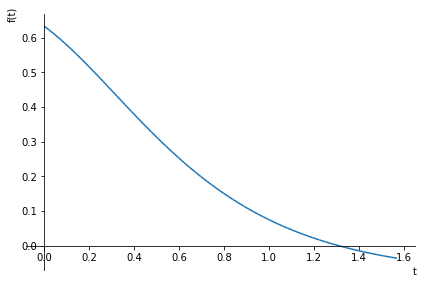

In [296]:
plot(1/(1-I*tanh(1))*1/2/(-I*t+1) + 1/(1+I*tanh(1))*1/2/(I*t+1),(t,0,pi/2))

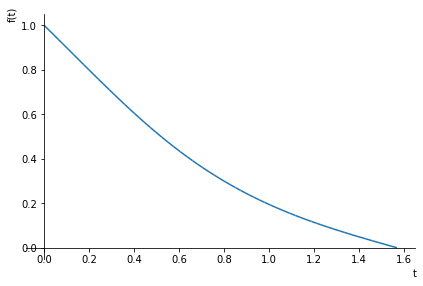

In [297]:
plot(1/(t**2+1)*1/(tan(t)+1),(t,0,pi/2))

In [282]:
Eq((2*I*pi*omega)*F(omega), pi*((1 + I)/2)*(exp(-abs(2*pi*omega))) +
   + pi/(exp(2)+I)*(exp(-abs(2*pi*omega))) +
   + pi*(I - 1/(exp(2)-I) -1/(exp(2)+I))*Heaviside(omega)*(exp(-abs(2*pi*omega))) +
   I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))*(1/(2*I*pi*n+2-I*pi/2)/2 - 1/(2*I*pi*n-2-I*pi/2)/2), (n,-oo,oo)))

Eq(2*I*pi*omega*F(omega), I*pi*Sum((1/(2*(2*I*pi*n + 2 - I*pi/2)) - 1/(2*(2*I*pi*n - 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)) + pi*(-1/(exp(2) - I) - 1/(exp(2) + I) + I)*exp(-2*pi*Abs(omega))*Heaviside(omega) + pi*exp(-2*pi*Abs(omega))/(exp(2) + I) + pi*(1/2 + I/2)*exp(-2*pi*Abs(omega)))

In [165]:
Eq((2*I*pi*omega)*F(omega), pi*((1 + I)/2 +1/(exp(2)+I))*(exp(-abs(2*pi*omega))) +
   + pi*(I - (1/(exp(2)-I) +1/(exp(2)+I)))*Heaviside(omega)*(exp(-abs(2*pi*omega))) +
   I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))*(1/(2*I*pi*n+2+I*pi/2)/2 - 1/(2*I*pi*n+2-I*pi/2)/2), (n,-oo,oo)))

Eq(2*I*pi*omega*F(omega), I*pi*Sum((1/(2*(2*I*pi*n + 2 + I*pi/2)) - 1/(2*(2*I*pi*n + 2 - I*pi/2)))*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)) + pi*(-1/(exp(2) - I) - 1/(exp(2) + I) + I)*exp(-2*pi*Abs(omega))*Heaviside(omega) + pi*(1/2 + 1/(exp(2) + I) + I/2)*exp(-2*pi*Abs(omega)))

In [183]:
A = Function("A")
B, C = symbols('B, C')

In [192]:
Eq(A(n),(I/(2*I*pi*n+2+I*pi/2)/2 - I/(2*I*pi*n+2-I*pi/2)/2) )

Eq(A(n), I/(2*(2*I*pi*n + 2 + I*pi/2)) - I/(2*(2*I*pi*n + 2 - I*pi/2)))

In [193]:
Eq(B, ((1 + I)/2 +1/(exp(2)+I)))

Eq(B, 1/2 + 1/(exp(2) + I) + I/2)

In [194]:
Eq(C, (I - (1/(exp(2)-I) +1/(exp(2)+I))))

Eq(C, -1/(exp(2) - I) - 1/(exp(2) + I) + I)

In [195]:
Eq((2*I*pi*omega)*F(omega), B*pi*(exp(-abs(2*pi*omega))) + C*pi*Heaviside(omega)*(exp(-abs(2*pi*omega))) +
   pi*Sum(A(n)*exp(-2*I*pi*omega*(pi*n-pi/4)), (n,-oo,oo)))

Eq(2*I*pi*omega*F(omega), pi*B*exp(-2*pi*Abs(omega)) + pi*C*exp(-2*pi*Abs(omega))*Heaviside(omega) + pi*Sum(A(n)*exp(-2*I*pi*omega*(pi*n - pi/4)), (n, -oo, oo)))

In [190]:
Eq((2*I*pi*omega)*F(omega),Integral(diff(f(tau),tau)*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(2*I*pi*omega*F(omega), Integral(exp(-2*I*pi*omega*tau)*Derivative(f(tau), tau), (tau, -oo, oo)))

In [189]:
Eq(f(tau),Integral(F(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)))

Eq(f(tau), Integral(F(omega)*exp(2*I*pi*omega*tau), (omega, -oo, oo)))

In [203]:
Eq(diff(f(tau),tau), 
   B*pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)) + 
   C*pi*Integral(Heaviside(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)) +
   pi*Sum(A(n)*Integral(exp(-2*I*pi*omega*(pi*n-pi/4))*exp(2*I*pi*omega*tau),(omega, -oo,oo)), (n,-oo,oo))
)

Eq(Derivative(f(tau), tau), pi*B*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, -oo, oo)) + pi*C*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*Heaviside(omega), (omega, -oo, oo)) + pi*Sum(A(n)*Integral(exp(2*I*pi*omega*tau)*exp(-2*I*pi*omega*(pi*n - pi/4)), (omega, -oo, oo)), (n, -oo, oo)))

In [211]:
Eq(
    B*pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    B/(1+tau**2)
)

Eq(pi*B*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, -oo, oo)), B/(tau**2 + 1))

In [205]:
Eq(
    C*pi*Integral(Heaviside(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    C*pi*Integral(exp(-2*pi*omega)*exp(2*I*pi*omega*tau),(omega, 0,oo))
)

Eq(pi*C*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*Heaviside(omega), (omega, -oo, oo)), pi*C*Integral(exp(-2*pi*omega)*exp(2*I*pi*omega*tau), (omega, 0, oo)))

In [206]:
Eq(
    C*pi*Integral(Heaviside(omega)*exp(-abs(2*pi*omega))*exp(2*I*omega*tau),(omega, -oo,oo)),
    C*pi*Integral(exp(-2*pi*omega)*exp(2*I*pi*omega*tau),(omega, 0,oo)).doit()
)

Eq(pi*C*Integral(exp(-2*pi*Abs(omega))*exp(2*I*omega*tau)*Heaviside(omega), (omega, -oo, oo)), pi*C*Piecewise((1/(2*pi*(-I*tau + 1)), Abs(arg(tau) - pi/2) <= pi/2), (Integral(exp(-2*pi*omega)*exp(2*I*pi*omega*tau), (omega, 0, oo)), True)))

In [207]:
Eq(
    C*pi*Integral(Heaviside(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    C*pi/(2*pi*(-I*tau+1))
)

Eq(pi*C*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*Heaviside(omega), (omega, -oo, oo)), C/(2*(-I*tau + 1)))

In [226]:
Eq(
    Integral(exp(-2*I*pi*omega*(pi*n-pi/4))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    DiracDelta(tau - pi*n+pi/4)
)

Eq(Integral(exp(2*I*pi*omega*tau)*exp(-2*I*pi*omega*(pi*n - pi/4)), (omega, -oo, oo)), DiracDelta(-pi*n + tau + pi/4))

In [227]:
exp(-2*I*pi*omega*tau).subs(tau,(pi*n-pi/4))

exp(-2*I*pi*omega*(pi*n - pi/4))

In [228]:
Eq(diff(f(tau),tau), B/(1+tau**2) + C*pi/(2*pi*(-I*tau+1)) + pi*Sum(A(n)*DiracDelta(tau - pi*n + pi/4), (n,-oo,oo)))

Eq(Derivative(f(tau), tau), B/(tau**2 + 1) + C/(2*(-I*tau + 1)) + pi*Sum(A(n)*DiracDelta(-pi*n + tau + pi/4), (n, -oo, oo)))

In [229]:
Eq(f(tau) - f(0), 
   B*Integral(1/(1+t**2),(t,0,tau)) + 
   C*Integral(1/(2*(-I*tau+1)),(t,0,tau)) + 
   pi*Sum(A(n)*Integral(DiracDelta(tau - pi*n + pi/4),(t,0,tau)), (n,-oo,oo))
)

Eq(-f(0) + f(tau), B*Integral(1/(t**2 + 1), (t, 0, tau)) + C*Integral(1/(-2*I*tau + 2), (t, 0, tau)) + pi*Sum(A(n)*Integral(DiracDelta(-pi*n + tau + pi/4), (t, 0, tau)), (n, -oo, oo)))

In [230]:
Sum(A(n)* DiracDelta(tau - pi*n + pi/4),(n,-2,2)).doit()

A(-2)*DiracDelta(tau + 9*pi/4) + A(-1)*DiracDelta(tau + 5*pi/4) + A(0)*DiracDelta(tau + pi/4) + A(1)*DiracDelta(tau - 3*pi/4) + A(2)*DiracDelta(tau - 7*pi/4)

In [215]:
Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))

Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2))

In [232]:
B*Integral(1/(1+t**2),(t,0,tau)).doit() + C*Integral(1/(2*(-I*t+1)),(t,0,tau)).doit()

B*atan(tau) + C*(I*log(-2*I*tau + 2)/2 - I*log(2)/2)

In [233]:
Eq(f(tau) - f(0),
((1 + I)/2 +1/(exp(2)+I))*Integral(1/(1+t**2),(t,0,tau)).doit() + 
(I - (1/(exp(2)-I) +1/(exp(2)+I)))*Integral(1/(2*(-I*t+1)),(t,0,tau)).doit()
  )

Eq(-f(0) + f(tau), (I*log(-2*I*tau + 2)/2 - I*log(2)/2)*(-1/(exp(2) - I) - 1/(exp(2) + I) + I) + (1/2 + 1/(exp(2) + I) + I/2)*atan(tau))

In [237]:
Eq(f(tau) - f(0),
((1 + I)/2 +1/(exp(2)+I))*Integral(1/(1+t**2),(t,0,tau)).doit() + 
(I - (1/(exp(2)-I) +1/(exp(2)+I)))*Integral(1/(2*(-I*t+1)),(t,0,tau)).doit()
  ).subs(tau,pi/2)

Eq(-f(0) + f(pi/2), (-I*log(2)/2 + I*log(2 - I*pi)/2)*(-1/(exp(2) - I) - 1/(exp(2) + I) + I) + (1/2 + 1/(exp(2) + I) + I/2)*atan(pi/2))

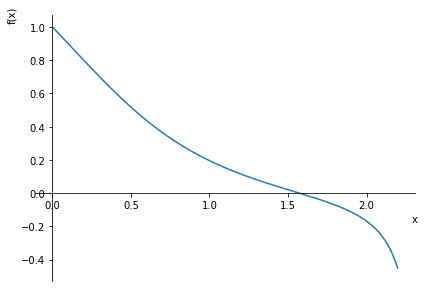

In [220]:
plot(1/(1+x**2)*1/(1+tan(x)),(x,0,pi*0.7))

In [144]:
Eq(1/(1+tan(tau)), I - I/(1-I*exp(2*I*tau))+(1-I)/2)

Eq(1/(tan(tau) + 1), 1/2 + I/2 - I/(-I*exp(2*I*tau) + 1))

In [145]:
Eq(tan(tau), I-2*I/(1+exp(-2*I*tau)))

Eq(tan(tau), I - 2*I/(1 + exp(-2*I*tau)))

In [150]:
Eq(tan(tau), I-2*I/(1+exp(-2*I*tau))).subs(tau,pi/4+I).expand()

Eq(tan(pi/4 + I), -2*I/(1 - I*exp(2)) + I)

In [152]:
Eq(tan(pi/4 +I)/2, 1/(I+exp(2))+I/2)

Eq(tan(pi/4 + I)/2, 1/(exp(2) + I) + I/2)

In [153]:
Eq(tan(pi/4 +I)/2, 1/(I+exp(2))+I/2).subs(I,-I)

Eq(tan(pi/4 - I)/2, -I/2 + 1/(exp(2) - I))

In [160]:
Eq(1/(1+tan(tau)), I + 1/(I + exp(2*I*tau))+(1-I)/2).subs(tau,-I).expand()

Eq(1/(1 - I*tanh(1)), 1/2 + 1/(exp(2) + I) + I/2)

In [162]:
Eq(1/(1+tan(tau)), I + 1/(I + exp(2*I*tau))+(1-I)/2).subs(tau,-I).expand().subs(I,-I)

Eq(1/(1 + I*tanh(1)), 1/2 - I/2 + 1/(exp(2) - I))

In [166]:
integrate(exp(-2*pi*omega)/omega,(omega, 0, oo))

oo

In [172]:
Eq(1/(1+tan(x)),-I*Sum(exp(2*I*(x+pi/4)*n),(n,1,oo))+(1-I)/2)

Eq(1/(tan(x) + 1), -I*Sum(exp(2*I*n*(x + pi/4)), (n, 1, oo)) + 1/2 - I/2)

In [173]:
Eq(I/(1+tan(x)),Sum(exp(2*I*(x+pi/4)*n),(n,1,oo))+(I+1)/2)

Eq(I/(tan(x) + 1), Sum(exp(2*I*n*(x + pi/4)), (n, 1, oo)) + 1/2 + I/2)

In [174]:
Eq(I/(1+tan(x)),Sum(exp(2*I*(x+pi/4)*n),(n,1,oo))+(I+1)/2).subs(x,-x-pi/2)

Eq(I/(cot(x) + 1), Sum(exp(2*I*n*(-x - pi/4)), (n, 1, oo)) + 1/2 + I/2)

In [178]:
I/(tan(x)+1)+I/(cot(x)+1)-I

-I + I/(cot(x) + 1) + I/(tan(x) + 1)

## Numerical Test

In [343]:
Eq(StraightPart(R, omega)+ArcPart(R, omega), 2*pi*I*Sum(Res(n, R, omega),(n,-N,N)))

Eq(ArcPart(R, omega) + StraightPart(R, omega), 2*I*pi*Sum(Res(n, R, omega), (n, -N, N)))

In [344]:
Eq(StraightPart(R, omega), Integral(integrand,(z,-R,R)))

Eq(StraightPart(R, omega), Integral((1/(2*(z + I)) - 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), (z, -R, R)))

In [345]:
Eq(ArcPart(R, omega), Integral(integrand.subs(z,R*exp(I*theta))*I*R*exp(I*theta), (theta,0,pi)))

Eq(ArcPart(R, omega), Integral(I*R*(1/(2*(R*exp(I*theta) + I)) - 1/(2*(R*exp(I*theta) - I)))*exp(I*theta)*exp(-2*I*pi*R*omega*exp(I*theta))/(-I*exp(2*I*R*exp(I*theta)) + 1), (theta, 0, pi)))

In [252]:
sub_list = [(R,1.5), (omega, -0.3), (epsilon, 0.0000001)]
sub_list

[(R, 1.5), (omega, -0.3), (epsilon, 1e-07)]

The contour goes from -R to R, then counter clockwise through the upper half plane from R to -R.

In [348]:
poles_test = [I, -pi/4]

In [6]:
StraightPartPV = Function("StraightPartPV")
PoleArc = Function("PoleArc")

In [350]:
Eq(StraightPartPV(R, omega, epsilon), Integral(integrand,(z,-R,-pi/4-epsilon)) + Integral(integrand,(z,-pi/4+epsilon, R)))

Eq(StraightPartPV(R, omega, epsilon), Integral((1/(2*(z + I)) - 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), (z, -R, -epsilon - pi/4)) + Integral((1/(2*(z + I)) - 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), (z, epsilon - pi/4, R)))

In [355]:
Eq(z, -pi/4 + epsilon*exp(I*phi))

Eq(z, epsilon*exp(I*phi) - pi/4)

In [358]:
Eq(Derivative(z, phi), diff(epsilon*exp(I*phi),phi))

Eq(Derivative(z, phi), I*epsilon*exp(I*phi))

In [361]:
Eq(PoleArc(R, omega, epsilon),
   Integral(integrand.subs(z,-pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),(phi,pi,0))
  )

Eq(PoleArc(R, omega, epsilon), Integral(I*epsilon*(1/(2*(epsilon*exp(I*phi) - pi/4 + I)) - 1/(2*(epsilon*exp(I*phi) - pi/4 - I)))*exp(I*phi)*exp(-2*I*pi*omega*(epsilon*exp(I*phi) - pi/4))/(-I*exp(2*I*(epsilon*exp(I*phi) - pi/4)) + 1), (phi, pi, 0)))

In [ ]:
Eq(StraightPartPV(R, omega, epsilon) + PoleArc(R, omega, epsilon) + ArcPart(R, omega),
    Integral(integrand,(z,-R,-pi/4-epsilon)).subs(sub_list).evalf() + 
    Integral(integrand,(z,-pi/4+epsilon, R)).subs(sub_list).evalf() +
    Integral(integrand.subs(z,-pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),(phi,pi,0)).subs(sub_list).evalf() +
    Integral(integrand.subs(z,R*exp(I*theta))*I*R*exp(I*theta),(theta,0,pi)).subs(sub_list).evalf()
)

In [392]:
Eq(StraightPartPV(R, omega, epsilon) + PoleArc(R, omega, epsilon) + ArcPart(R, omega),2*pi*I*Res(0, R, omega))

Eq(ArcPart(R, omega) + PoleArc(R, omega, epsilon) + StraightPartPV(R, omega, epsilon), 2*I*pi*Res(0, R, omega))

In [367]:
Eq(Res(0, R, omega), Limit((z-I)*integrand,z,I))

Eq(Res(0, R, omega), Limit((z - I)*(1/(2*(z + I)) - 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), z, I))

In [368]:
Eq(Res(0, R, omega), Limit((z-I)*integrand,z,I).doit())

Eq(Res(0, R, omega), -exp(2)*exp(2*pi*omega)/(2*exp(2) - 2*I))

In [379]:
Eq(2*pi*I*Res(0, R, omega), (2*pi*I*Limit((z-I)*integrand,z,I).doit()).subs(sub_list).evalf())

Eq(2*I*pi*Res(0, R, omega), 0.0633946608871013 - 0.468426705667476*I)

In [396]:
Eq(2*pi*I*Res(0, R, omega), (2*pi*I*Limit((z-I)*integrand,z,I).doit()))

Eq(2*I*pi*Res(0, R, omega), -2*I*pi*exp(2)*exp(2*pi*omega)/(2*exp(2) - 2*I))

In [385]:
Integral(
    integrand.subs(z,-pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),(phi,pi,0)
).subs([(R, 1.5), (omega, -0.3), (epsilon, 1e-14)]).evalf() 

-0.967553153509304 - 0.0876626035780846*I

In [390]:
integrate(Limit(integrand.subs(z,-pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0).doit(),(phi,pi,0)).simplify()

-8*I*pi*exp(I*pi**2*omega/2)/(pi**2 + 16)

In [393]:
Eq(StraightPartPV(R, omega, epsilon) + ArcPart(R, omega),2*pi*I*Res(0, R, omega) - PoleArc(R, omega, epsilon))

Eq(ArcPart(R, omega) + StraightPartPV(R, omega, epsilon), -PoleArc(R, omega, epsilon) + 2*I*pi*Res(0, R, omega))

In [399]:
Eq(StraightPartPV(R, omega, epsilon) + ArcPart(R, omega),
   -pi*I*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I) + 8*I*pi*exp(I*pi**2*omega/2)/(pi**2+16)
)

Eq(ArcPart(R, omega) + StraightPartPV(R, omega, epsilon), 8*I*pi*exp(I*pi**2*omega/2)/(pi**2 + 16) - I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I))

In [253]:
Eq(StraightPartPV(R, omega, epsilon),
    Integral(integrand,(z,-R,-pi/4-epsilon)).subs(sub_list).evalf() + 
    Integral(integrand,(z,-pi/4+epsilon, R)).subs(sub_list).evalf()
)

Eq(StraightPartPV(R, omega, epsilon), 0.968208060560655 - 0.527193147803554*I)

In [254]:
Eq(2*pi*I*Res(0, R, omega) - PoleArc(R, omega, epsilon) - ArcPart(R, omega),
   (-pi*I*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I) + 8*I*pi*exp(I*pi**2*omega/2)/(pi**2+16)).subs(sub_list).evalf()
   -Integral(integrand.subs(z,R*exp(I*theta))*I*R*exp(I*theta),(theta,0,pi)).subs(sub_list).evalf()
  )

Eq(-ArcPart(R, omega) - PoleArc(R, omega, epsilon) + 2*I*pi*Res(0, R, omega), 0.9682081204925 - 0.527193202706669*I)

### More general pole arc

In [18]:
Eq(PoleArc(R, omega, epsilon, n),-pi*I*Res(n,R,omega))

Eq(PoleArc(R, omega, epsilon, n), -I*pi*Res(n, R, omega))

In [19]:
Eq(PoleArc(R, omega, epsilon, n),
   Limit(Integral(integrand.subs(z,n*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),(phi,pi,0)),epsilon,0)
  )

Eq(PoleArc(R, omega, epsilon, n), Limit(Integral(I*epsilon*(1/(2*(epsilon*exp(I*phi) + pi*n - pi/4 + I)) - 1/(2*(epsilon*exp(I*phi) + pi*n - pi/4 - I)))*exp(I*phi)*exp(-2*I*pi*omega*(epsilon*exp(I*phi) + pi*n - pi/4))/(-I*exp(2*I*(epsilon*exp(I*phi) + pi*n - pi/4)) + 1), (phi, pi, 0)), epsilon, 0))

In [428]:
Eq(pi*I*Res(n,R,omega), pi*I*Limit((z-(n*pi-pi/4))*I*exp(-2*I*pi*omega*z)/((z**2+1)*(I*exp(2*I*z)-1)),z,n*pi-pi/4))

Eq(I*pi*Res(n, R, omega), I*pi*Limit(I*(-pi*n + z + pi/4)*exp(-2*I*pi*omega*z)/((z**2 + 1)*(I*exp(2*I*z) - 1)), z, pi*n - pi/4))

In [10]:
Eq(
    I*pi*Limit((z-(n*pi-pi/4))*I*exp(-2*I*pi*omega*z)/((z**2+1)*(I*exp(2*I*z)-1)),z,n*pi-pi/4),
    (I*pi/(I*pi*(4*n-1)+4) - I*pi/(I*pi*(4*n-1)-4))*exp(-2*I*pi*omega*(n*pi-pi/4))
)

Eq(I*pi*Limit(I*(-pi*n + z + pi/4)*exp(-2*I*pi*omega*z)/((z**2 + 1)*(I*exp(2*I*z) - 1)), z, pi*n - pi/4), (I*pi/(I*pi*(4*n - 1) + 4) - I*pi/(I*pi*(4*n - 1) - 4))*exp(-2*I*pi*omega*(pi*n - pi/4)))

In [11]:
Eq(
    I*pi*Limit((z-(n*pi-pi/4))*I*exp(-2*I*pi*omega*z)/((z**2+1)*(I*exp(2*I*z)-1)),z,n*pi-pi/4),
    8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4))
)

Eq(I*pi*Limit(I*(-pi*n + z + pi/4)*exp(-2*I*pi*omega*z)/((z**2 + 1)*(I*exp(2*I*z) - 1)), z, pi*n - pi/4), 8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16))

In [134]:
Eq(pi*I*Res(n,R,omega), 8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)))

Eq(I*pi*Res(n, R, omega), 8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16))

In [17]:
Eq(
    integrate(Limit(integrand.subs(z,0*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0),(phi,pi,0)),
    integrate(Limit(integrand.subs(z,0*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0).doit(),
              (phi,pi,0)).simplify()
)

Eq(Integral(Limit(I*epsilon*(1/(2*(epsilon*exp(I*phi) - pi/4 + I)) - 1/(2*(epsilon*exp(I*phi) - pi/4 - I)))*exp(I*phi)*exp(-2*I*pi*omega*(epsilon*exp(I*phi) - pi/4))/(-I*exp(2*I*(epsilon*exp(I*phi) - pi/4)) + 1), epsilon, 0), (phi, pi, 0)), -8*I*pi*exp(I*pi**2*omega/2)/(pi**2 + 16))

In [13]:
(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4))).subs(n,0)

8*I*pi*exp(I*pi**2*omega/2)/(pi**2 + 16)

In [20]:
Eq(
    integrate(Limit(integrand.subs(z,1*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0),(phi,pi,0)),
    integrate(Limit(integrand.subs(z,1*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0).doit(),
              (phi,pi,0)).simplify()
)

Eq(Integral(Limit(I*epsilon*(1/(2*(epsilon*exp(I*phi) + 3*pi/4 + I)) - 1/(2*(epsilon*exp(I*phi) + 3*pi/4 - I)))*exp(I*phi)*exp(-2*I*pi*omega*(epsilon*exp(I*phi) + 3*pi/4))/(-I*exp(2*I*(epsilon*exp(I*phi) + 3*pi/4)) + 1), epsilon, 0), (phi, pi, 0)), -8*I*pi*exp(-3*I*pi**2*omega/2)/(16 + 9*pi**2))

In [21]:
(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4))).subs(n,1)

8*I*pi*exp(-3*I*pi**2*omega/2)/(16 + 9*pi**2)

In [22]:
Eq(
    integrate(Limit(integrand.subs(z,-1*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0),(phi,pi,0)),
    integrate(Limit(integrand.subs(z,-1*pi -pi/4 + epsilon*exp(I*phi))*I*epsilon*exp(I*phi),epsilon,0).doit(),
              (phi,pi,0)).simplify()
)

Eq(Integral(Limit(I*epsilon*(1/(2*(epsilon*exp(I*phi) - 5*pi/4 + I)) - 1/(2*(epsilon*exp(I*phi) - 5*pi/4 - I)))*exp(I*phi)*exp(-2*I*pi*omega*(epsilon*exp(I*phi) - 5*pi/4))/(-I*exp(2*I*(epsilon*exp(I*phi) - 5*pi/4)) + 1), epsilon, 0), (phi, pi, 0)), -8*I*pi*exp(5*I*pi**2*omega/2)/(16 + 25*pi**2))

In [23]:
(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4))).subs(n,-1)

8*I*pi*exp(5*I*pi**2*omega/2)/(16 + 25*pi**2)

In [27]:
solve(-R<pi*n-pi/4,n).expand()

n > -R/pi + 1/4

In [28]:
solve(pi*n-pi/4<R,n).expand()

n < R/pi + 1/4

In [62]:
subs_list2 = [(R,2.4)]

In [310]:
def n_low_high(R):
    return [int(-R/pi+1/4 - frac(-R/pi+1/4))+1, int(floor(R/pi + 1/4))]

def poles_in_contour(R):
    low_high_n = n_low_high(R)
    return [pi*n-pi/4 for n in range(low_high_n[0], low_high_n[1] + 1)]

def pv_integration_limits(R, epsilon):
    poles = poles_in_contour(R)
    pv_limits = [-R]
    for p in poles:
        pv_limits.append(p-epsilon)
        pv_limits.append(p+epsilon)
    pv_limits.append(R)
    return pv_limits

def pv_integral_straight(R, omega, epsilon, numeric=False):
    pv_lims = pv_integration_limits(R, epsilon)
    integration_sections = [Integral(I*exp(-2*I*pi*omega*z)/(z**2+1)/(I*exp(2*I*z)-1),(z,pv_lims[2*i],pv_lims[2*i+1])) 
                             for i in range(int(len(pv_lims)/2))]
    if numeric:
        pv_straight = sum([s.subs([(R,R),(omega,omega),(epsilon,epsilon)]).evalf() for s in integration_sections])
    else:
        pv_straight = integration_sections[0]
        for i in range(len(integration_sections) - 1):
            pv_straight += integration_sections[i+1]
    return pv_straight

def half_residues(R, omega):
    low_high_n = n_low_high(R)
    return Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)), (n, low_high_n[0], low_high_n[1]))

def straight_part_analytic(R, omega, numeric=False):
    if numeric:  
        result = (
            -Integral((-I/(z**2+1)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1)).subs(z,R*exp(I*theta))*I*R*exp(I*theta), 
                      (theta,0,pi)).subs([(R,R),(omega,omega)]).evalf() +
            -(I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)).evalf() 
            + half_residues(R, omega).doit().evalf()
        )
    else:
        result = (
            -Integral((-I/(z**2+1)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1)).subs(z,R*exp(I*theta))*I*R*exp(I*theta), 
                      (theta,0,pi)) +
            -I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I) +
            half_residues(R, omega)
        )
    return result

In [331]:
pv_straight = pv_integral_straight(3, omega, epsilon)

In [332]:
pv_straight

Integral(I*exp(-2*I*pi*omega*z)/((z**2 + 1)*(I*exp(2*I*z) - 1)), (z, -3, -epsilon - pi/4)) + Integral(I*exp(-2*I*pi*omega*z)/((z**2 + 1)*(I*exp(2*I*z) - 1)), (z, epsilon - pi/4, -epsilon + 3*pi/4)) + Integral(I*exp(-2*I*pi*omega*z)/((z**2 + 1)*(I*exp(2*I*z) - 1)), (z, epsilon + 3*pi/4, 3))

### Principal Value with negative omega

In [126]:
Eq(StraightPart(R, omega), 2*pi*I*Sum(Res(n, R, omega),(n,-N,N)) - ArcPart(R, omega))

Eq(StraightPart(R, omega), -ArcPart(R, omega) + 2*I*pi*Sum(Res(n, R, omega), (n, -N, N)))

In [143]:
Eq(ArcPart(R, omega), Integral(integrand.subs(z,R*exp(I*theta))*I*R*exp(I*theta), (theta,0,pi)))

Eq(ArcPart(R, omega), Integral(I*R*(1/(2*(R*exp(I*theta) + I)) - 1/(2*(R*exp(I*theta) - I)))*exp(I*theta)*exp(-2*I*pi*R*omega*exp(I*theta))/(-I*exp(2*I*R*exp(I*theta)) + 1), (theta, 0, pi)))

In [144]:
Eq(2*pi*I*Res(0, R, omega), (2*pi*I*Limit((z-I)*integrand,z,I).doit()))

Eq(2*I*pi*Res(0, R, omega), -2*I*pi*exp(2)*exp(2*pi*omega)/(2*exp(2) - 2*I))

In [145]:
-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)

-I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I)

In [142]:
half_residues(8)

Sum(8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -2, 3))

In [235]:
Eq(StraightPart(3, -1), straight_part_analytic(3, -1))

Eq(StraightPart(3, -1), -I*pi*exp(2)*exp(-2*pi)/(exp(2) - I) - Integral(3*exp(I*theta)*exp(6*I*pi*exp(I*theta))/((-I*exp(6*I*exp(I*theta)) + 1)*(9*exp(2*I*theta) + 1)), (theta, 0, pi)) + Sum(8*I*pi*exp(2*I*pi*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, 0, 1)))

In [338]:
Eq(StraightPart(10, 0.3), straight_part_analytic(10, 0.3, numeric=True))

Eq(StraightPart(10, 0.3), -1.26216587543593 + 19.7970083542318*I)

In [354]:
Eq(StraightPart(10, -10.3), straight_part_analytic(10, -10.3, numeric=True))

Eq(StraightPart(10, -10.3), 0.320173727354662 + 0.699367845863499*I)

In [362]:
pv_integral_straight(30, 10.3, 1e-30, numeric=True)

0.326134325677817 - 0.696412248163896*I

In [360]:
Eq(StraightPart(30, 10.3), 
   conjugate(straight_part_analytic(30, -10.3, numeric=True)) - (I*pi*exp(-2*pi*abs(omega)).subs(omega,10.3)).evalf()
)

Eq(StraightPart(10, 10.3), 0.320173727354662 - 0.699367845863499*I)

In [316]:
Eq(StraightPart(R, omega), Integral(integrand,(z,-R,R)))

Eq(StraightPart(R, omega), Integral((1/(2*(z + I)) - 1/(2*(z - I)))*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z) + 1), (z, -R, R)))

In [318]:
(1/(2*(z+I)) - 1/(2*(z-I))).simplify()

-I/(z**2 + 1)

In [320]:
Eq(StraightPart(R, omega), Integral(-I/(z**2+1)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z)+1),(z,-R,R)))

Eq(StraightPart(R, omega), Integral(-I*exp(-2*I*pi*omega*z)/((z**2 + 1)*(-I*exp(2*I*z) + 1)), (z, -R, R)))

In [322]:
Eq(
    -Integral(I/(z**2+1)*exp(-2*I*pi*omega*z)/(-I*exp(2*I*z)+1),(z,-oo,oo)),
    Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)), (n, -oo, oo)) -
    I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)
)

Eq(-Integral(I*exp(-2*I*pi*omega*z)/((z**2 + 1)*(-I*exp(2*I*z) + 1)), (z, -oo, oo)), Sum(8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) - I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I))

In [323]:
Eq(G(omega, I), Integral(1/(1+tau**2)*I/(1-I*exp(2*I*tau))*exp(-2*I*pi*omega*tau),(tau,-oo,oo)))

Eq(G(omega, I), Integral(I*exp(-2*I*pi*omega*tau)/((tau**2 + 1)*(-I*exp(2*I*tau) + 1)), (tau, -oo, oo)))

In [5]:
(Eq(G(-omega, I), I*pi*exp(-abs(2*pi*omega)) + G(omega, -I))).subs(I,-I)

Eq(G(-omega, -I), G(omega, I) - I*pi*exp(-2*pi*Abs(omega)))

In [7]:
(Eq(G(-omega, I), I*pi*exp(-abs(2*pi*omega)) + G(omega, -I))).subs(omega,-3)

Eq(G(3, I), G(-3, -I) + I*pi*exp(-6*pi))

In [346]:
Eq(StraightPart(10, 0.3), 
   conjugate(straight_part_analytic(10, -0.3, numeric=True)) - (I*pi*exp(-2*pi*abs(omega)).subs(omega,0.3)).evalf()
)

Eq(StraightPart(10, 0.3), 1.42425972517025 - 0.0542111163683702*I)

In [341]:
conjugate(I)

-I

In [9]:
Eq(G(-abs(omega), I),I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I) - 
    Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(2*I*pi*abs(omega)*(n*pi-pi/4)), (n, -oo, oo))
  )
    

Eq(G(-Abs(omega), I), -Sum(8*I*pi*exp(2*I*pi*(pi*n - pi/4)*Abs(omega))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I))

In [11]:
(Eq(G(-omega, I), I*pi*exp(-abs(2*pi*omega)) + G(omega, -I))).subs(omega,-abs(omega))

Eq(G(Abs(omega), I), G(-Abs(omega), -I) + I*pi*exp(-2*pi*Abs(Abs(omega))))

In [16]:
Eq(G(abs(omega), I), 
   (-Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(2*I*pi*abs(omega)*(n*pi-pi/4)), (n, -oo, oo))).subs(I,-I) + 
   ((I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)).subs(I,-I) + I*pi*exp(-2*pi*abs(omega)))
)

Eq(G(Abs(omega), I), -Sum(-8*I*pi*exp(-2*I*pi*(pi*n - pi/4)*Abs(omega))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) - I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) + I) + I*pi*exp(-2*pi*Abs(omega)))

In [32]:
Heaviside(-1)

0

In [33]:
Eq(G(omega, I), 
   sign(omega)*Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)), (n, -oo, oo)) + 
   Heaviside(omega)*(-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)+I) + I*pi*exp(-2*pi*abs(omega))) +
   Heaviside(-omega)*I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)
)

Eq(G(omega, I), (-I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) + I) + I*pi*exp(-2*pi*Abs(omega)))*Heaviside(omega) + sign(omega)*Sum(8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + I*pi*exp(2)*exp(-2*pi*Abs(omega))*Heaviside(-omega)/(exp(2) - I))

In [34]:
Eq(Heaviside(omega), (sign(omega) + 1)/2)

Eq(Heaviside(omega), sign(omega)/2 + 1/2)

In [35]:
Eq(Heaviside(-omega), (sign(-omega) + 1)/2)

Eq(Heaviside(-omega), 1/2 - sign(omega)/2)

In [40]:
Eq(G(omega, I), 
   sign(omega)*Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)), (n, -oo, oo)) + 
   (sign(omega) + 1)/2*(-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)+I) + I*pi*exp(-2*pi*abs(omega))) +
   (-sign(omega) + 1)/2*I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)
)

Eq(G(omega, I), I*pi*(1/2 - sign(omega)/2)*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I) + (-I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) + I) + I*pi*exp(-2*pi*Abs(omega)))*(sign(omega)/2 + 1/2) + sign(omega)*Sum(8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)))

In [44]:
Eq(G(omega, I), 
   sign(omega)*Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)), (n, -oo, oo)) + 
   sign(omega)*((-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)+I) + I*pi*exp(-2*pi*abs(omega)))/2 +
   -I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)/2).simplify() +
   ((-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)+I) + I*pi*exp(-2*pi*abs(omega)))/2).simplify() +
   I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)/2
)

Eq(G(omega, I), sign(omega)*Sum(8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) - I*pi*exp(-2*pi*Abs(omega))*tanh(2)*sign(omega)/2 - pi*exp(-2*pi*Abs(omega))/(2*(exp(2) + I)) + I*pi*exp(2)*exp(-2*pi*Abs(omega))/(2*(exp(2) - I)))

In [47]:
Eq((2*I*pi*omega)*F(omega), (1 + I)/2*pi*exp(-abs(2*pi*omega)) - G(omega, I))

Eq(2*I*pi*omega*F(omega), -G(omega, I) + pi*(1/2 + I/2)*exp(-2*pi*Abs(omega)))

In [52]:
Eq((2*I*pi*omega)*F(omega), 
   -sign(omega)*Sum(8*I*pi/(pi**2*(4*n-1)**2+16)*exp(-2*I*pi*omega*(n*pi-pi/4)), (n, -oo, oo)) + 
   -sign(omega)*((-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)+I) + I*pi*exp(-2*pi*abs(omega)))/2 +
   -I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)/2).simplify() +
   (-((-I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)+I) + I*pi*exp(-2*pi*abs(omega)))/2) +
   -I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)/2
   + (1 + I)/2*pi*exp(-abs(2*pi*omega))).simplify()
)

Eq(2*I*pi*omega*F(omega), -sign(omega)*Sum(8*I*pi*exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + I*pi*exp(-2*pi*Abs(omega))*tanh(2)*sign(omega)/2 + pi*(1 + 2*exp(2) + exp(4))*exp(-2*pi*Abs(omega))/(2*(1 + exp(4))))

In [59]:
Eq((2*I*pi*omega)*F(omega),
    - sign(omega)*8*I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    + I*pi*sign(omega)*exp(-2*pi*abs(omega))*tanh(2)/2
    + pi*(1 + 1/cosh(2))*exp(-2*pi*abs(omega))/2
)


Eq(2*I*pi*omega*F(omega), -8*I*pi*sign(omega)*Sum(exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + I*pi*exp(-2*pi*Abs(omega))*tanh(2)*sign(omega)/2 + pi*(1/cosh(2) + 1)*exp(-2*pi*Abs(omega))/2)

In [62]:
Eq(F(omega),
    - Sum(4/abs(omega)*exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    + 1/(4*abs(omega))*exp(-2*pi*abs(omega))*tanh(2)
    -I/(4*omega)*(1 + 1/cosh(2))*exp(-2*pi*abs(omega))
)

Eq(F(omega), -Sum(4*exp(-2*I*pi*omega*(pi*n - pi/4))/((pi**2*(4*n - 1)**2 + 16)*Abs(omega)), (n, -oo, oo)) + exp(-2*pi*Abs(omega))*tanh(2)/(4*Abs(omega)) - I*(1/cosh(2) + 1)*exp(-2*pi*Abs(omega))/(4*omega))

In [68]:
Eq(f(tau),
- Sum(4/(pi**2*(4*n-1)**2 + 16)*Integral(exp(-2*I*pi*omega*(pi*n-pi/4))/abs(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)), (n,-oo,oo))
+ tanh(2)/4*Integral(exp(-2*pi*abs(omega))/abs(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo))
-I*(1 + 1/cosh(2))/4*Integral(exp(-2*pi*abs(omega))/omega*exp(2*I*pi*omega*tau),(omega,-oo,oo))
)

Eq(f(tau), -I*(1/cosh(2) + 1)*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)/omega, (omega, -oo, oo))/4 + tanh(2)*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)/Abs(omega), (omega, -oo, oo))/4 - Sum(4*Integral(exp(2*I*pi*omega*tau)*exp(-2*I*pi*omega*(pi*n - pi/4))/Abs(omega), (omega, -oo, oo))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)))

In [69]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, 0,oo)),
    pi/(2*pi*(-I*tau+1))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, 0, oo)), 1/(2*(-I*tau + 1)))

In [80]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    (pi/(2*pi*(-I*tau+1)) + pi/(2*pi*(I*tau+1))).simplify()
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, -oo, oo)), 1/(tau**2 + 1))

In [82]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*integrate(exp(2*I*pi*omega*t),(t,0,tau)),(omega, -oo,oo)),
    integrate(1/(t**2+1),(t,0,tau))
)

Eq(pi*Integral(Piecewise(((-I*exp(2*I*pi*omega*tau)/(2*pi*omega) + I/(2*pi*omega))*exp(-2*pi*Abs(omega)), (omega > -oo) & (omega < oo) & Ne(omega, 0)), (tau*exp(-2*pi*Abs(omega)), True)), (omega, -oo, oo)), atan(tau))

In [87]:
Eq(integrate(exp(2*I*pi*omega*tau)/omega*exp(-2*pi*abs(omega)),(omega, -oo, oo)),2*I*atan(tau))

Eq(Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)/omega, (omega, -oo, oo)), 2*I*atan(tau))

In [79]:
Eq(
    Integral(exp(-abs(2*pi*omega))*integrate(2*I*pi*exp(2*I*pi*omega*t),(t,0, tau)),(omega, 0,oo)),
    integrate(2*I*pi/(2*pi*(-I*t+1)),(t,0,tau))
)

Eq(Integral(Piecewise(((exp(2*I*pi*omega*tau)/omega - 1/omega)*exp(-2*pi*Abs(omega)), (omega > -oo) & (omega < oo) & Ne(omega, 0)), (2*I*pi*tau*exp(-2*pi*Abs(omega)), True)), (omega, 0, oo)), -log(-tau - I) - I*pi/2)

In [78]:
integrate(1/(t**2+1),(t,0,tau))

atan(tau)

In [24]:
Eq(I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I),
    (
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I))/2 +
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)).subs(I,-I)/2
    ).simplify() +
    (
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I))/2 -
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)).subs(I,-I)/2
    ).simplify()  
)

Eq(I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) - I), -pi*exp(-2*pi*Abs(omega) + 2)/(1 + exp(4)) + I*pi*exp(-2*pi*Abs(omega) + 4)/(1 + exp(4)))

In [28]:
Eq(I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I),
    (
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I))/2 +
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)).subs(I,-I)/2
    ).simplify() +
    (
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I))/2 -
        (I*pi*exp(2)*exp(-2*pi*abs(omega))/(exp(2)-I)).subs(I,-I)/2
    ).simplify()  
).subs(I,-I)

Eq(-I*pi*exp(2)*exp(-2*pi*Abs(omega))/(exp(2) + I), -pi*exp(-2*pi*Abs(omega) + 2)/(1 + exp(4)) - I*pi*exp(-2*pi*Abs(omega) + 4)/(1 + exp(4)))

In [27]:
sign(omega)

sign(omega)

In [30]:
(-I*pi*exp(-2*pi*abs(omega)+4)/(1+exp(4)) + I*pi*exp(-2*pi*abs(omega))).simplify()

I*pi*exp(-2*pi*Abs(omega))/(1 + exp(4))

## Inverse FT

In [93]:
Eq((2*I*pi*omega)*F(omega),
    - sign(omega)*8*I*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    + I*pi*sign(omega)*exp(-2*pi*abs(omega))*tanh(2)/2
    + pi*(1 + 1/cosh(2))*exp(-2*pi*abs(omega))/2
)

Eq(2*I*pi*omega*F(omega), -8*I*pi*sign(omega)*Sum(exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + I*pi*exp(-2*pi*Abs(omega))*tanh(2)*sign(omega)/2 + pi*(1/cosh(2) + 1)*exp(-2*pi*Abs(omega))/2)

In [292]:
Eq(-I*8*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo)),
   exp(I*pi**2*omega/2)/4*Sum(exp(-2*I*pi**2*omega*n)/(n + (-1 + 4*I/pi)/4), (n,-oo,oo)) - 
   exp(I*pi**2*omega/2)/4*Sum(exp(-2*I*pi**2*omega*n)/(n + (-1 - 4*I/pi)/4), (n,-oo,oo))
  )

Eq(-8*I*pi*Sum(exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)), -exp(I*pi**2*omega/2)*Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 - I/pi), (n, -oo, oo))/4 + exp(I*pi**2*omega/2)*Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 + I/pi), (n, -oo, oo))/4)

In [69]:
(pi*(sinh(2*pi*omega)-I*sinh(2*pi*omega+2))/2/cosh(2)).subs(omega,-omega)

pi*(-sinh(2*pi*omega) - I*sinh(-2*pi*omega + 2))/(2*cosh(2))

In [84]:
(-I*8*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-2,2))).subs(omega, omega/pi).doit()

-8*I*pi*(exp(9*I*pi*omega/2)/(16 + 81*pi**2) + exp(5*I*pi*omega/2)/(16 + 25*pi**2) + exp(I*pi*omega/2)/(pi**2 + 16) + exp(-3*I*pi*omega/2)/(16 + 9*pi**2) + exp(-7*I*pi*omega/2)/(16 + 49*pi**2))

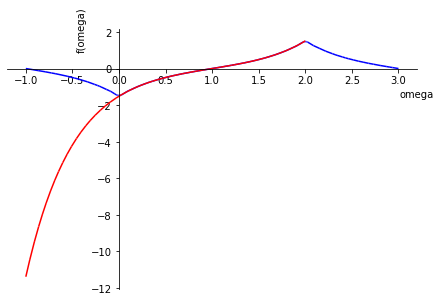

In [87]:
p = plot(im(-I*8*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-8,8))).subs(omega, omega/pi),
         (omega,-1,3),line_color='b',show=False)
p.extend(plot(im(pi*(sinh(2*pi*omega) + I*sinh(2*pi*omega - 2))/2/cosh(2)).subs(omega, omega/pi),
              (omega,-1,2), line_color='r', show=False))
p.show()


In [362]:
(pi*2*(4*n-1)**2 + 16).expand()

32*pi*n**2 - 16*pi*n + 2*pi + 16

In [396]:
integrate(exp(-a*pi*omega)*exp(2)/(1+I*exp(2))*exp(-2*I*pi*n*omega/T)/T,(omega,0,T)
         ).subs(T,1/pi).subs(exp(2*I*pi*n),1).subs(a, (2-I*pi/2)).simplify()

Piecewise((-2*I/(4*I*pi*n + 4 - I*pi), Ne(n, -(pi**2 + 16)/(pi*(-4*pi + 16*I)))), ((exp(2) - I*exp(4))/(1 + exp(4)), True))

In [397]:
integrate(exp(-a*pi*omega)*exp(2)/(1-I*exp(2))*exp(-2*I*pi*n*omega/T)/T,(omega,0,T)
         ).subs(T,1/pi).subs(exp(2*I*pi*n),1).subs(a, (2+I*pi/2)).simplify()

Piecewise((2*I/(4*I*pi*n + 4 + I*pi), Ne(n, -(pi**2 + 16)/(pi*(4*pi + 16*I)))), ((exp(2) + I*exp(4))/(1 + exp(4)), True))

In [ ]:
(2-I*pi/2)

In [371]:
Eq(a, -(2*I*pi)/4 + (2*I*pi)*I/pi)

Eq(a, -2 - I*pi/2)

In [291]:
# http://www.math.chalmers.se/~mohammad/teaching/0304/TMA682/pdf/Fourier_series.pdf
# 0 < b < 2*pi
Eq(exp(b*theta), (exp(2*pi*b)-1)/2*pi*Sum(exp(I*n*theta)/(b-n*I),(n,-oo,oo)))

Eq(exp(b*theta), pi*(exp(2*pi*b)/2 - 1/2)*Sum(exp(I*n*theta)/(b - I*n), (n, -oo, oo)))

In [298]:
Eq(I*2*pi*exp(-I*b*theta)/(1-exp(-I*2*pi*b)), Sum(exp(I*n*theta)/(b+n),(n,-oo,oo)))

Eq(2*I*pi*exp(-I*b*theta)/(1 - exp(-2*I*pi*b)), Sum(exp(I*n*theta)/(b + n), (n, -oo, oo)))

In [302]:
Eq(I*2*pi*exp(-I*b*theta)/(1-exp(-I*2*pi*b)), Sum(exp(I*n*theta)/(b+n),(n,-oo,oo))).subs(
    [(theta,-omega*pi**2*2), (b,(-1 + 4*I/pi)/4)]
)

Eq(2*I*pi*exp(2*I*pi**2*omega*(-1/4 + I/pi))/(1 - exp(-2*I*pi*(-1/4 + I/pi))), Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 + I/pi), (n, -oo, oo)))

In [304]:
(I*2*pi*exp(-I*b*theta)/(1-exp(-I*2*pi*b))).subs([(theta,-omega*pi**2*2), (b,(-1 + 4*I/pi)/4)])

2*I*pi*exp(-pi*omega*(2 + I*pi/2))/(1 - I*exp(2))

In [319]:
(exp(I*pi**2*omega/2)/4*(I*2*pi*exp(-I*b*theta)/(1-exp(-I*2*pi*b))).subs([(theta,-omega*pi**2*2), (b,(-1 + 4*I/pi)/4)]) -
exp(I*pi**2*omega/2)/4*(I*2*pi*exp(-I*b*theta)/(1-exp(-I*2*pi*b))).subs([(theta,-omega*pi**2*2), (b,(-1 - 4*I/pi)/4)])).factor()

-pi*(exp(2)*exp(2*pi*omega) + I*exp(2*pi*omega) - exp(-2)*exp(-2*pi*omega) - I*exp(-2*pi*omega))/(2*(exp(-2) - I)*(exp(2) - I))

In [322]:
(-pi*((exp(2)*exp(2*pi*omega)- exp(-2)*exp(-2*pi*omega)).simplify() + 
     (I*exp(2*pi*omega) -I*exp(-2*pi*omega)).simplify()
    )/((exp(-2) - I)*(exp(2) - I)).simplify()/2).expand()

pi*sinh(2*pi*omega)/(2*cosh(2)) - I*pi*sinh(2*pi*omega + 2)/(2*cosh(2))

In [62]:
pi*(sinh(2*pi*omega)-I*sinh(2*pi*omega+2))/2/cosh(2)

pi*(sinh(2*pi*omega) - I*sinh(2*pi*omega + 2))/(2*cosh(2))

In [31]:
(pi*(sinh(2*pi*omega)-I*(sinh(2*pi*omega)*cosh(2) + sinh(2)*cosh(2*pi*omega)))/2/cosh(2)).expand().collect(sinh(2*pi*omega))

(pi/(2*cosh(2)) - I*pi/2)*sinh(2*pi*omega) - I*pi*sinh(2)*cosh(2*pi*omega)/(2*cosh(2))

In [54]:
pi/2*(I - 1/cosh(2))*sinh(2*pi*omega) - I*pi*tanh(2)*cosh(2*pi*omega)

pi*(-1/cosh(2) + I)*sinh(2*pi*omega)/2 - I*pi*cosh(2*pi*omega)*tanh(2)

In [22]:
Eq(sin(x + y), sin(x)*cos(y) + cos(x)*sin(y))

Eq(sin(x + y), sin(x)*cos(y) + sin(y)*cos(x))

In [35]:
Eq(alpha*sin(x + y), alpha*sin(x)*cos(y) + alpha*cos(x)*sin(y)).subs(x,I*2*pi*omega)

Eq(alpha*sin(2*I*pi*omega + y), alpha*sin(y)*cosh(2*pi*omega) + I*alpha*cos(y)*sinh(2*pi*omega))

In [39]:
Eq((pi/2*(1/cosh(2)-I)/(-I*pi*sinh(2)/(2*cosh(2)))).simplify(),
   I*alpha*cos(y)/(alpha*sin(y))
  )

Eq((cosh(2) + I)/sinh(2), I*cos(y)/sin(y))

In [52]:
sin(I*2)

I*sinh(2)

In [46]:
solve(x**2 -1)

[-1, 1]

In [348]:
(-pi*((exp(2)*exp(2*pi*omega)- exp(-2)*exp(-2*pi*omega)).simplify() + 
     (I*exp(2*pi*omega) -I*exp(-2*pi*omega)).simplify()
    )/((exp(-2) - I)*(exp(2) - I)).simplify()/2).expand().subs(omega,-0.3).evalf()

-1.34321280030309 - 0.0481395008642538*I

In [349]:
Sum(-I*8*pi*exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-200,200)).subs(omega,-0.3).doit().evalf()

-1.34320885142541 - 0.0481390887812243*I

In [328]:
Eq(-I*sin(a+b), -I*sin(a)*cos(b) + -I*sin(b)*cos(a)).subs([(a, I*2*pi*omega), (b, I*2)])

Eq(sinh(2*pi*omega + 2), sinh(2*pi*omega)*cosh(2) + sinh(2)*cosh(2*pi*omega))

In [283]:
Eq(1/(pi**2*(4*n-1)**2 + 16), (I/(pi*(4*n-1) + 4*I)/8 - I/(pi*(4*n-1) - 4*I)/8))

Eq(1/(pi**2*(4*n - 1)**2 + 16), I/(8*(pi*(4*n - 1) + 4*I)) - I/(8*(pi*(4*n - 1) - 4*I)))

In [92]:
Eq(diff(f(tau),tau),Integral((2*I*pi*omega)*F(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)))

Eq(Derivative(f(tau), tau), Integral(2*I*pi*omega*F(omega)*exp(2*I*pi*omega*tau), (omega, -oo, oo)))

In [104]:
Eq(
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,0)) +
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, 0,oo))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, oo)), pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, 0)) + pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, 0, oo)))

In [105]:
Eq(
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    - pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,0))
    + pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, 0,oo))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, oo)), -pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, -oo, 0)) + pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, 0, oo)))

In [106]:
Eq(
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    - pi*Integral(exp(-abs(2*pi*omega))*exp(-2*I*pi*omega*tau),(omega, 0,oo))
    + pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, 0,oo))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, oo)), -pi*Integral(exp(-2*pi*Abs(omega))*exp(-2*I*pi*omega*tau), (omega, 0, oo)) + pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, 0, oo)))

In [107]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, 0,oo)),
    pi/(2*pi*(-I*tau+1))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, 0, oo)), 1/(2*(-I*tau + 1)))

In [108]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*exp(-2*I*pi*omega*tau),(omega, 0,oo)),
    pi/(2*pi*(I*tau+1))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(-2*I*pi*omega*tau), (omega, 0, oo)), 1/(2*(I*tau + 1)))

In [110]:
Eq(
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    pi/(2*pi*(-I*tau+1)) - pi/(2*pi*(I*tau+1))
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, oo)), -1/(2*(I*tau + 1)) + 1/(2*(-I*tau + 1)))

In [111]:
Eq(
    pi*Integral(sign(omega)*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    (pi/(2*pi*(-I*tau+1)) - pi/(2*pi*(I*tau+1))).simplify()
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, oo)), I*tau/(tau**2 + 1))

In [113]:
integrate(t/(t**2+1),(t,0,tau))

log(tau**2 + 1)/2

In [122]:
Eq(
    pi*Integral(exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,oo)),
    (pi/(2*pi*(-I*tau+1)) + pi/(2*pi*(I*tau+1))).simplify()
)

Eq(pi*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, -oo, oo)), 1/(tau**2 + 1))

In [102]:
Integral(pi*exp(-abs(2*pi*omega))*exp(-2*I*pi*omega*tau),(omega, 0,oo)).subs(tau,-0.2).evalf()

0.480769230769231 + 0.0961538461538462*I

In [103]:
Integral(pi*exp(-abs(2*pi*omega))*exp(2*I*pi*omega*tau),(omega, -oo,0)).subs(tau,-0.2).evalf()

0.480769230769231 + 0.0961538461538462*I

In [117]:
Eq(Integral(sign(omega)*exp(-t*2*I*pi*omega),(omega, -oo,oo)), 1/(I*pi*t))

Eq(Integral(exp(-2*I*pi*omega*t)*sign(omega), (omega, -oo, oo)), -I/(pi*t))

In [119]:
Eq(pi*Integral(sign(omega)*exp(-2*I*pi*omega*(-tau+pi*n-pi/4)),(omega, -oo,oo)), -I/(-tau+pi*n-pi/4))

Eq(pi*Integral(exp(-2*I*pi*omega*(pi*n - tau - pi/4))*sign(omega), (omega, -oo, oo)), -I/(pi*n - tau - pi/4))

In [120]:
Eq(diff(f(tau),tau),Integral((2*I*pi*omega)*F(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)))

Eq(Derivative(f(tau), tau), Integral(2*I*pi*omega*F(omega)*exp(2*I*pi*omega*tau), (omega, -oo, oo)))

In [121]:
Eq(diff(f(tau),tau),
  - 8*I*pi*Sum(Integral(sign(omega)*exp(-2*I*pi*omega*(pi*n-pi/4))*exp(2*I*pi*omega*tau),(omega,-oo,oo))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    + I*pi*Integral(sign(omega)*exp(-2*pi*abs(omega))*exp(2*I*pi*omega*tau),(omega,-oo,oo))*tanh(2)/2
    + pi*(1 + 1/cosh(2))*Integral(exp(-2*pi*abs(omega))*exp(2*I*pi*omega*tau),(omega,-oo,oo))/2
  )

Eq(Derivative(f(tau), tau), pi*(1/cosh(2) + 1)*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau), (omega, -oo, oo))/2 + I*pi*tanh(2)*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)*sign(omega), (omega, -oo, oo))/2 - 8*I*pi*Sum(Integral(exp(2*I*pi*omega*tau)*exp(-2*I*pi*omega*(pi*n - pi/4))*sign(omega), (omega, -oo, oo))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)))

In [130]:
Eq(diff(f(tau),tau),
    - 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    - tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2
)

Eq(Derivative(f(tau), tau), -tau*tanh(2)/(2*(tau**2 + 1)) - 8*Sum(1/((pi**2*(4*n - 1)**2 + 16)*(pi*n - tau - pi/4)), (n, -oo, oo)) + (1/cosh(2) + 1)/(2*(tau**2 + 1)))

In [131]:
Eq(diff(f(tau),tau), diff(Integral(1/(1+t**2)*1/(1+tan(t)), (t, 0, tau)),tau))

Eq(Derivative(f(tau), tau), 1/((tau**2 + 1)*(tan(tau) + 1)))

In [139]:
Eq(1/(1+tau**2)*1/(1+tan(tau)),
   - 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    - tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2
)

Eq(1/((tau**2 + 1)*(tan(tau) + 1)), -tau*tanh(2)/(2*(tau**2 + 1)) - 8*Sum(1/((pi**2*(4*n - 1)**2 + 16)*(pi*n - tau - pi/4)), (n, -oo, oo)) + (1/cosh(2) + 1)/(2*(tau**2 + 1)))

In [218]:
Eq(Integral(1/(1+t**2)*1/(1+tan(t)),(t,0,tau)),
   - 8*Sum(integrate((1/(-t+pi*n-pi/4)),(t,0,tau))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    - integrate(t/(t**2+1),(t,0,tau))*tanh(2)/2 + (1 + 1/cosh(2))*integrate(1/(t**2+1),(t,0,tau))/2
)

Eq(Integral(1/((t**2 + 1)*(tan(t) + 1)), (t, 0, tau)), -log(tau**2 + 1)*tanh(2)/4 + (1/cosh(2) + 1)*atan(tau)/2 - 8*Sum((log(-4*pi*n + pi) - log(-4*pi*n + 4*tau + pi))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)))

In [92]:
log((4*pi*n-4*tau-pi)/(4*pi*n-pi)).subs(tau,(-tau/4-pi/4))

log((4*pi*n + tau)/(4*pi*n - pi))

In [237]:
Eq(Integral(1/(1+t**2)*1/(1+tan(t)),(t,0,pi/2)),
   - 8*Sum(ln((4*n-1)/(4*n-3))/(pi**2*(4*n-1)**2 + 16), (n,-N,N))
    - log(pi**2/4+1)*tanh(2)/4 + (1 + 1/cosh(2))*atan(pi/2)/2
)

Eq(Integral(1/((t**2 + 1)*(tan(t) + 1)), (t, 0, pi/2)), -8*Sum(log((4*n - 1)/(4*n - 3))/(pi**2*(4*n - 1)**2 + 16), (n, -N, N)) - log(1 + pi**2/4)*tanh(2)/4 + (1/cosh(2) + 1)*atan(pi/2)/2)

In [239]:
(- 8*Sum(ln((4*n-1)/(4*n-3))/(pi**2*(4*n-1)**2 + 16), (n,-N,N))
    - log(pi**2/4+1)*tanh(2)/4 + (1 + 1/cosh(2))*atan(pi/2)/2).subs(N,50).evalf()

0.597381940557020

In [235]:
ln((-4*pi*n+pi+4*tau)/(-4*pi*n+4*tau+pi) - 4*tau/(-4*pi*n+4*tau+pi)).subs(tau,pi/2).simplify()

log((4*n - 1)/(4*n - 3))

In [222]:
Eq(Integral(1/(1+t**2)*1/(1+tan(t)),(t,0,tau)),
   - 8*Sum(integrate((1/(-t+pi*n-pi/4)),(t,0,tau))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    - integrate(t/(t**2+1),(t,0,tau))*tanh(2)/2 + (1 + 1/cosh(2))*integrate(1/(t**2+1),(t,0,tau))/2
).subs(tau,pi/2)

TypeError: can't convert -oo to int

In [141]:
Eq(1/(1+tau**2)*1/(1+tan(tau)) - (- tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2),
   - 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
)

Eq(tau*tanh(2)/(2*(tau**2 + 1)) - (1/cosh(2) + 1)/(2*(tau**2 + 1)) + 1/((tau**2 + 1)*(tan(tau) + 1)), -8*Sum(1/((pi**2*(4*n - 1)**2 + 16)*(pi*n - tau - pi/4)), (n, -oo, oo)))

In [143]:
Eq((1/(1+tau**2)*1/(1+tan(tau)) - (- tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2)),
   - 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
)

Eq(tau*tanh(2)/(2*(tau**2 + 1)) - (1/cosh(2) + 1)/(2*(tau**2 + 1)) + 1/((tau**2 + 1)*(tan(tau) + 1)), -8*Sum(1/((pi**2*(4*n - 1)**2 + 16)*(pi*n - tau - pi/4)), (n, -oo, oo)))

In [152]:
f1 = (1/(1+tau**2)*1/(1+tan(tau)) - (- tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2))
f2 = - 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-100,100)).doit()

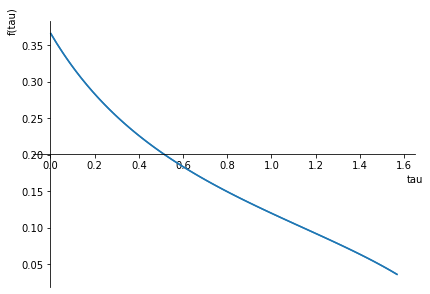

In [155]:
plot(f1, f2, (tau, 0, pi/2))

In [156]:
q = Function("q")

In [158]:
Eq(q(n), pi*n- pi/4)

Eq(q(n), pi*n - pi/4)

In [159]:
Eq((1/(1+tau**2)*1/(1+tan(tau)) - (- tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2)),
   - 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
)

Eq(tau*tanh(2)/(2*(tau**2 + 1)) - (1/cosh(2) + 1)/(2*(tau**2 + 1)) + 1/((tau**2 + 1)*(tan(tau) + 1)), -8*Sum(1/((pi**2*(4*n - 1)**2 + 16)*(pi*n - tau - pi/4)), (n, -oo, oo)))

In [165]:
Eq(1/(1+tau**2)*(2/(1+tan(tau)) + tau*tanh(2) - 1 - 1/cosh(2)),
   - Sum((1/(-tau+q(n)))/(q(n)**2 + 1), (n,-oo,oo))
)

Eq((tau*tanh(2) - 1 - 1/cosh(2) + 2/(tan(tau) + 1))/(tau**2 + 1), -Sum(1/((-tau + q(n))*(q(n)**2 + 1)), (n, -oo, oo)))

In [271]:
Eq(1/(1+tau**2)*(2/(1+tan(tau)) + tau*tanh(2) - 1 - 1/cosh(2)),
   - im(Sum((1/(-tau+q(n)))/(q(n) - I), (n,-oo,oo)))
)

Eq((tau*tanh(2) - 1 - 1/cosh(2) + 2/(tan(tau) + 1))/(tau**2 + 1), -im(Sum(1/((-tau + q(n))*(q(n) - I)), (n, -oo, oo))))

In [275]:
Eq(1/(x-tau)/(x-I),apart(1/(x-tau)/(x-I),x)).subs(x,q(n))

Eq(1/((-tau + q(n))*(q(n) - I)), -1/((tau - I)*(q(n) - I)) + 1/((-tau + q(n))*(tau - I)))

In [168]:
(1/(-tau+x))/(x**2 + 1)

1/((-tau + x)*(x**2 + 1))

In [192]:
Eq(alpha/(-tau+x) + beta*x/(x**2 + 1),
   (alpha*(x**2 + 1) -alpha*x*(-tau+x)).expand()/(-tau+x)/(x**2 + 1)
)

Eq(alpha/(-tau + x) + beta*x/(x**2 + 1), (alpha*tau*x + alpha)/((-tau + x)*(x**2 + 1)))

In [193]:
integrate(digamma(t)/(t+a),t)

Integral(polygamma(0, t)/(a + t), t)

In [186]:
(I/(q(n)+I)/2 - I/(q(n)-tau)/2).simplify()

I*(tau + I)/(2*(tau - q(n))*(q(n) + I))

In [267]:
Eq(1/(q(n)**2+1), (I/(q(n)+I)/2 - I/(q(n)-I)/2))

Eq(1/(q(n)**2 + 1), I/(2*(q(n) + I)) - I/(2*(q(n) - I)))

In [270]:
im(1/(pi-I))

1/(1 + pi**2)

In [135]:
(- 8*Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-200,200))
    - tau/(tau**2+1)*tanh(2)/2 + (1 + 1/cosh(2))*1/(tau**2+1)/2).subs(tau,-0.3).evalf()

1.32833262603535

In [133]:
(1/(tau**2+1)/(tan(tau)+1)).subs(tau,-0.3).evalf()

1.32833262516239

In [137]:
Sum((1/(-tau+pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo)).doit()

Sum(1/((pi**2*(4*n - 1)**2 + 16)*(pi*n - tau - pi/4)), (n, -oo, oo))

In [138]:
integrate(1/(-t+pi*n-pi/4),(t,0,tau))

log(-4*pi*n + pi) - log(-4*pi*n + 4*tau + pi)

In [183]:
aa = 1
if aa == 2 or aa == 3:
    print(aa)

## Evaluate Inverse FT of integral

In [194]:
Eq(f(tau),
- Sum(4/(pi**2*(4*n-1)**2 + 16)*Integral(exp(-2*I*pi*omega*(pi*n-pi/4))/abs(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)), (n,-oo,oo))
+ tanh(2)/4*Integral(exp(-2*pi*abs(omega))/abs(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo))
-I*(1 + 1/cosh(2))/4*Integral(exp(-2*pi*abs(omega))/omega*exp(2*I*pi*omega*tau),(omega,-oo,oo))
)

Eq(f(tau), -I*(1/cosh(2) + 1)*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)/omega, (omega, -oo, oo))/4 + tanh(2)*Integral(exp(-2*pi*Abs(omega))*exp(2*I*pi*omega*tau)/Abs(omega), (omega, -oo, oo))/4 - Sum(4*Integral(exp(2*I*pi*omega*tau)*exp(-2*I*pi*omega*(pi*n - pi/4))/Abs(omega), (omega, -oo, oo))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)))

In [195]:
Eq(f(0),
- Sum(4/(pi**2*(4*n-1)**2 + 16)*Integral(exp(-2*I*pi*omega*(pi*n-pi/4))/abs(omega),(omega,-oo,oo)), (n,-oo,oo))
+ tanh(2)/4*Integral(exp(-2*pi*abs(omega))/abs(omega),(omega,-oo,oo))
-I*(1 + 1/cosh(2))/4*Integral(exp(-2*pi*abs(omega))/omega,(omega,-oo,oo))
)

Eq(f(0), -Sum(4*Integral(exp(-2*I*pi*omega*(pi*n - pi/4))/Abs(omega), (omega, -oo, oo))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)) + tanh(2)*Integral(exp(-2*pi*Abs(omega))/Abs(omega), (omega, -oo, oo))/4 - I*(1/cosh(2) + 1)*Integral(exp(-2*pi*Abs(omega))/omega, (omega, -oo, oo))/4)

In [252]:
Integral(exp(-2*I*pi*omega*2)/abs(omega),(omega,-100,100)).evalf()

-0.e+0 + 0.e-100*I

In [240]:
Eq(Integral(1/(1+t**2)*1/(1+tan(t)),(t,0,tau)),
   - 8*Sum(integrate((1/(-t+pi*n-pi/4)),(t,0,tau))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    - integrate(t/(t**2+1),(t,0,tau))*tanh(2)/2 + (1 + 1/cosh(2))*integrate(1/(t**2+1),(t,0,tau))/2
)

Eq(Integral(1/((t**2 + 1)*(tan(t) + 1)), (t, 0, tau)), -log(tau**2 + 1)*tanh(2)/4 + (1/cosh(2) + 1)*atan(tau)/2 - 8*Sum((log(-4*pi*n + pi) - log(-4*pi*n + 4*tau + pi))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)))

In [197]:
Eq(tan(x), Sum(2*x/(pi**2*(n+1/2)**2-x**2),(n,0,oo)))

Eq(tan(x), Sum(2*x/(-x**2 + pi**2*(n + 0.5)**2), (n, 0, oo)))

In [212]:
tan(x).subs(x,0.63)

0.729114729240969

In [213]:
Sum(2*x/(pi**2*(n+1/2)**2-x**2),(n,0,99)).doit().subs(x,0.63).evalf()

0.727838091254190

In [215]:
Eq(integrate(tan(x),(x,0,tau)), Sum(integrate(2*x/((pi*n+pi/2)**2-x**2),(x,0,tau)),(n,0,oo)))

Eq(-log(cos(tau)), Sum(log(-4*pi**2*n**2 - 4*pi**2*n - pi**2) - log(-4*pi**2*n**2 - 4*pi**2*n + 4*tau**2 - pi**2), (n, 0, oo)))

In [266]:
integrate(tan(t)*exp(I*t*a),t)

Integral(exp(I*a*t)*tan(t), t)

In [263]:
integrate(exp(I*n*(x+t)+t*a),t).doit()

Piecewise((exp(a*t)*exp(I*n*t)/(a + I*n), Ne(a, -I*n)), (t, True))*exp(I*n*x)

## Closed Form of Fourier Series

In [10]:
coeff = Function("coeff")

In [11]:
Eq(coeff(n),1/R*Integral(f(x)*exp(-2*I*pi*x*n/R),(x,0,R)))

Eq(coeff(n), Integral(f(x)*exp(-2*I*pi*n*x/R), (x, 0, R))/R)

In [12]:
Eq(f(x), Sum(coeff(n)*exp(2*I*pi*n*x/R),(n,-oo,oo)))

Eq(f(x), Sum(coeff(n)*exp(2*I*pi*n*x/R), (n, -oo, oo)))

### Example Test Function

In [13]:
Eq(f(x),exp(theta*x))

Eq(f(x), exp(theta*x))

In [14]:
Eq(coeff(n),1/R*Integral(exp(theta*x)*exp(-2*I*pi*x*n/R),(x,0,R)))

Eq(coeff(n), Integral(exp(theta*x)*exp(-2*I*pi*n*x/R), (x, 0, R))/R)

In [15]:
Eq(coeff(n),1/R*Integral(exp(theta*x)*exp(-2*I*pi*x*n/R),(x,0,R)).doit())

Eq(coeff(n), Piecewise((-R*exp(R*theta)/(-R*theta*exp(2*I*pi*n) + 2*I*pi*n*exp(2*I*pi*n)) + R/(-R*theta + 2*I*pi*n), Ne(theta, 2*I*pi*n/R)), (R, True))/R)

In [16]:
Eq(coeff(n),(simplify((1/R*Integral(exp(theta*x)*exp(-2*I*pi*x*n/R),(x,0,R)).doit()).doit()).args[0][0]
 .subs([(exp(2*I*pi*n),1), (exp(-2*I*pi*n),1)])
).simplify())

Eq(coeff(n), (exp(R*theta) - 1)/(R*theta - 2*I*pi*n))

In [43]:
Eq(exp(theta*x), Piecewise((Sum((exp(R*theta)-1 )/(R*theta-2*I*pi*n)*exp(2*I*pi*n*x/R),(n,-oo,oo)),And(x>0,x<R))))

Eq(exp(theta*x), Piecewise((Sum((exp(R*theta) - 1)*exp(2*I*pi*n*x/R)/(R*theta - 2*I*pi*n), (n, -oo, oo)), (R > x) & (x > 0))))

In [48]:
Eq(exp(theta*x), Piecewise(((exp(R*theta)-1)*Sum(1/(R*theta-2*I*pi*n)*exp(2*I*pi*n*x/R),(n,-oo,oo)),And(x>0,x<R))))

Eq(exp(theta*x), Piecewise(((exp(R*theta) - 1)*Sum(exp(2*I*pi*n*x/R)/(R*theta - 2*I*pi*n), (n, -oo, oo)), (R > x) & (x > 0))))

In [55]:
Eq(exp(theta*x), Piecewise(((exp(R*theta)-1)*Sum(1/(R*theta+2*I*pi*n)*exp(-2*I*pi*n*x/R),(n,-oo,oo)),And(x>0,x<R))))

Eq(exp(theta*x), Piecewise(((exp(R*theta) - 1)*Sum(exp(-2*I*pi*n*x/R)/(R*theta + 2*I*pi*n), (n, -oo, oo)), (R > x) & (x > 0))))

In [53]:
testSubs = [(R,3), (theta, 0.2), (N,10)]

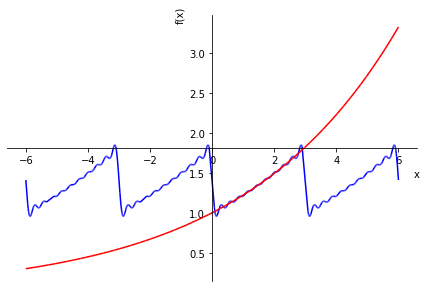

In [115]:
p = plot(
    ((exp(R*theta)-1)*Sum(1/(R*theta+2*I*pi*n)*exp(-2*I*pi*n*x/R),(n,-N,N))).subs(testSubs),
    (x,-6,6),line_color='b',show=False)

p.extend(plot(
    (exp(theta*x)).subs(testSubs),
    (x,-6,6), line_color='r', show=False))

p.show()

### Reverse engineering the Fourier Series in Cloased Form

In [5]:
Eq(-I*8*pi*Sum(exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo)),
   exp(I*pi**2*omega/2)/4*Sum(exp(-2*I*pi**2*omega*n)/(n + (-1 + 4*I/pi)/4), (n,-oo,oo)) - 
   exp(I*pi**2*omega/2)/4*Sum(exp(-2*I*pi**2*omega*n)/(n + (-1 - 4*I/pi)/4), (n,-oo,oo))
  )

Eq(-8*I*pi*Sum(exp(-2*I*pi*omega*(pi*n - pi/4))/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)), -exp(I*pi**2*omega/2)*Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 - I/pi), (n, -oo, oo))/4 + exp(I*pi**2*omega/2)*Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 + I/pi), (n, -oo, oo))/4)

In [116]:
Eq(
    2*I*pi*exp(theta*x)/(exp(R*theta)-1), 
    Piecewise((Sum(1/(R*theta/(2*I*pi)+n)*exp(-2*I*pi*n*x/R),(n,-oo,oo)),And(x>0,x<R)))
).subs([(R,1/pi),(x,omega),(theta,pi*(4 - I*pi)/2)]).simplify()

Eq(2*I*pi*exp(pi*omega*(4 - I*pi)/2)/(1 + I*exp(2)), -Piecewise((Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 - I/pi), (n, -oo, oo)), (omega > 0) & (omega < 1/pi))))

In [118]:
Eq(
    2*I*pi/(exp(R*theta)-1)*exp(theta*x), 
    Piecewise((Sum(1/(R*theta/(2*I*pi)+n)*exp(-2*I*pi*n*x/R),(n,-oo,oo)),And(x>0,x<R)))
).subs([(R,1/pi),(x,omega),(theta,-pi*(4 + I*pi)/2)]).simplify()

Eq(2*I*pi*exp(-pi*omega*(4 + I*pi)/2)/(1 + I*exp(-2)), -Piecewise((Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 + I/pi), (n, -oo, oo)), (omega > 0) & (omega < 1/pi))))

In [18]:
Eq(
    - Sum(exp(-2*I*pi**2*omega*n)/(n + (-1 - 4*I/pi)/4), (n,-oo,oo))
    + Sum(exp(-2*I*pi**2*omega*n)/(n + (-1 + 4*I/pi)/4), (n,-oo,oo)),
    Piecewise((
        2*I*pi*exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2)) - exp(-2*pi*omega)/(1+I*exp(-2))),
        And(omega>0,omega<1/pi)
    ))
)

Eq(-Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 - I/pi), (n, -oo, oo)) + Sum(exp(-2*I*pi**2*n*omega)/(n - 1/4 + I/pi), (n, -oo, oo)), Piecewise((2*I*pi*(exp(2*pi*omega)/(1 + I*exp(2)) - exp(-2*pi*omega)/(1 + I*exp(-2)))*exp(-I*pi**2*omega/2), (omega > 0) & (omega < 1/pi))))

In [53]:
Eq(
    Sum(-pi*2*16*I*exp(-2*I*pi**2*omega*n)/(pi**2*(4*n-1)**2 - 16*(I)**2), (n,-oo,oo)),
    Piecewise((
        2*I*pi*exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2)) - exp(-2*pi*omega)/(1+I*exp(-2))),
        And(omega>0,omega<1/pi)
    ))
)

Eq(Sum(-32*I*pi*exp(-2*I*pi**2*n*omega)/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)), Piecewise((2*I*pi*(exp(2*pi*omega)/(1 + I*exp(2)) - exp(-2*pi*omega)/(1 + I*exp(-2)))*exp(-I*pi**2*omega/2), (omega > 0) & (omega < 1/pi))))

/home/grahamhesketh/.local/lib/python3.8/site-packages/sympy/plotting/experimental_lambdify.py:192: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn(


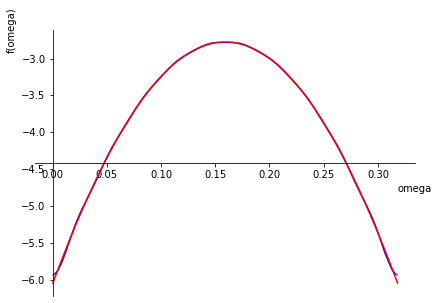

In [25]:
p = plot(
    im(Sum(exp(-2*I*pi**2*omega*n)*(1/(n-(1-I*4/pi)/4)-1/(n-(1+I*4/pi)/4)), (n,-N,N))).subs(N,10),
    (omega,0,1/pi),line_color='b',show=False)

p.extend(plot(
    im(2*I*pi*exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2)) - exp(-2*pi*omega)/(1+I*exp(-2)))),
    (omega,0,1/pi), line_color='r', show=False))

p.show()

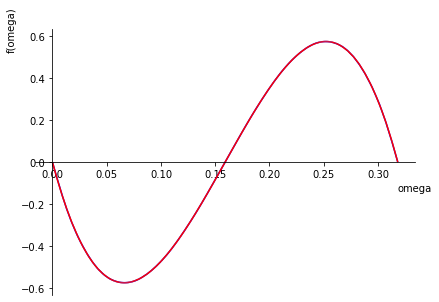

In [26]:
p = plot(
    re(Sum(exp(-2*I*pi**2*omega*n)*(1/(n-(1-I*4/pi)/4)-1/(n-(1+I*4/pi)/4)), (n,-N,N))).subs(N,10),
    (omega,0,1/pi),line_color='b',show=False)

p.extend(plot(
    re(2*I*pi*exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2)) - exp(-2*pi*omega)/(1+I*exp(-2)))),
    (omega,0,1/pi), line_color='r', show=False))

p.show()

In [20]:
(2*I*pi*exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2)) - exp(-2*pi*omega)/(1+I*exp(-2)))).subs(omega,0).simplify()

-2*I*pi*tanh(2)

In [23]:
Sum((1/(n + (-1 + 4*I/pi)/4)-1/(n + (-1 - 4*I/pi)/4)).simplify(), (n,-100,100)).evalf()

-6.04449494514618*I

In [24]:
(-2*I*pi*tanh(2)).evalf()

-6.05716392684826*I

## Convolution Integral

In [10]:
Eq(F(omega),
    - Sum(4/abs(omega)*exp(-2*I*pi*omega*(pi*n-pi/4))/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo))
    + 1/(4*abs(omega))*exp(-2*pi*abs(omega))*tanh(2)
    -I/(4*omega)*(1 + 1/cosh(2))*exp(-2*pi*abs(omega))
)

Eq(F(omega), -Sum(4*exp(-2*I*pi*omega*(pi*n - pi/4))/((pi**2*(4*n - 1)**2 + 16)*Abs(omega)), (n, -oo, oo)) + exp(-2*pi*Abs(omega))*tanh(2)/(4*Abs(omega)) - I*(1/cosh(2) + 1)*exp(-2*pi*Abs(omega))/(4*omega))

In [8]:
F1 = Function("F1")
F2 = Function("F2")
F3 = Function("F3")

In [28]:
Eq(F1(omega), - exp(2*I*pi*omega*pi/4)/abs(omega)*Sum(4*exp(-2*I*pi*omega*pi*n)/(pi**2*(4*n-1)**2 + 16), (n,-oo,oo)))

Eq(F1(omega), -exp(I*pi**2*omega/2)*Sum(4*exp(-2*I*pi**2*n*omega)/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo))/Abs(omega))

In [27]:
Eq(
    -Sum(4*exp(-2*I*pi**2*omega*n)/(pi**2*(4*n-1)**2 - 16*(I)**2), (n,-oo,oo)),
    Piecewise((
        exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4),
        And(omega>0,omega<1/pi)
    ))
)

Eq(-Sum(4*exp(-2*I*pi**2*n*omega)/(pi**2*(4*n - 1)**2 + 16), (n, -oo, oo)), Piecewise(((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*exp(-I*pi**2*omega/2), (omega > 0) & (omega < 1/pi))))

In [20]:
Eq(F2(omega), 1/(4*abs(omega))*exp(-2*pi*abs(omega))*tanh(2))

Eq(F2(omega), exp(-2*pi*Abs(omega))*tanh(2)/(4*Abs(omega)))

In [21]:
Eq(F3(omega), -I/(4*omega)*(1 + 1/cosh(2))*exp(-2*pi*abs(omega)))

Eq(F3(omega), -I*(1/cosh(2) + 1)*exp(-2*pi*Abs(omega))/(4*omega))

In [18]:
Eq(F(omega), F1(omega) + F2(omega) + F3(omega))

Eq(F(omega), F1(omega) + F2(omega) + F3(omega))

In [7]:
P = Function("P")
p = Function("p")
H = Function("H")
h = Function("h")

In [30]:
Eq(P(nu), Integral(F(omega)*H(nu-omega), (omega,-oo,oo)))

Eq(P(nu), Integral(F(omega)*H(nu - omega), (omega, -oo, oo)))

In [31]:
Eq(P(nu), 
   Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)) + 
   Integral(F2(omega)*H(nu-omega), (omega,-oo,oo)) +
   Integral(F3(omega)*H(nu-omega), (omega,-oo,oo))
)

Eq(P(nu), Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)) + Integral(F2(omega)*H(nu - omega), (omega, -oo, oo)) + Integral(F3(omega)*H(nu - omega), (omega, -oo, oo)))

In [32]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum((exp(2*I*pi*omega*pi/4)/abs(omega)*H(nu-omega)).subs(omega,omega-k/pi),(k,-oo,oo))*
        exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,1/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*exp(-I*pi**2*omega/2)*Sum(H(k/pi + nu - omega)*exp(I*pi**2*(-k/pi + omega)/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, 1/pi)))

In [9]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,1/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, 1/pi)))

In [10]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,N/pi)
    ) +
    Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,1/pi,N/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, N/pi)) + Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 1/pi, N/pi)))

In [18]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,N/pi)
    ) +
    Integral(
        (Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)).subs(omega,omega+1/pi)
        ,(omega,0,(N-1)/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, N/pi)) + Integral((exp(2*pi*(omega + 1/pi))/(4*(1 + I*exp(2))) - exp(-2*pi*(omega + 1/pi))/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega - 1/pi)*exp(-I*pi*k/2)/Abs(-k/pi + omega + 1/pi), (k, -oo, oo)), (omega, 0, (N - 1)/pi)))

In [21]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,N/pi)
    ) +
    Integral(
        (Sum(((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi))).subs(k,k+1).expand(),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)).subs(omega,omega+1/pi)
        ,(omega,0,(N-1)/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, N/pi)) + Integral((exp(2*pi*(omega + 1/pi))/(4*(1 + I*exp(2))) - exp(-2*pi*(omega + 1/pi))/(4*(1 + I*exp(-2))))*Sum(-I*H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, (N - 1)/pi)))

In [22]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,N/pi)
    ) -
    Integral(
        (Sum(((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi))),(k,-oo,oo))*
        (I*exp(2)*exp(2*pi*omega)/(1+I*exp(2))/4 - I*exp(2)*exp(-2*pi*omega)/(1+I*exp(-2))/4))
        ,(omega,0,(N-1)/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, N/pi)) - Integral((I*exp(2)*exp(2*pi*omega)/(4*(1 + I*exp(2))) - I*exp(2)*exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, (N - 1)/pi)))

In [32]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        Sum(((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi))),(k,-oo,oo))*
        (((I*exp(2)*exp(2*pi*omega)/(1+I*exp(2))/4 + 
         exp(2*pi*omega)/(1+I*exp(2))/4)).simplify() - 
         (I*exp(2)*exp(-2*pi*omega)/(1+I*exp(-2))/4 +
         exp(-2*pi*omega)/(1+I*exp(-2))/4).simplify())
        ,(omega,0,(N-1)/pi)
    )
    -Integral(
        Sum((exp(-I*pi*k/2)/abs(omega-k/pi)*H(nu-omega+k/pi)),(k,-oo,oo))*
        (exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,(N-1)/pi,N/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, (N - 1)/pi, N/pi)) - Integral((exp(2*pi*omega)/4 - (1 + I*exp(2))*exp(-2*pi*omega + 2)/(4*(exp(2) + I)))*Sum(H(k/pi + nu - omega)*exp(-I*pi*k/2)/Abs(k/pi - omega), (k, -oo, oo)), (omega, 0, (N - 1)/pi)))

In [38]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        (exp(2*I*pi*omega*pi/4)/omega*H(nu-omega) +
        Sum((exp(2*I*pi*(omega-k/pi)*pi/4)/(k/pi-omega)*H(nu-omega+k/pi)) +
        (exp(2*I*pi*(omega+k/pi)*pi/4)/(omega+k/pi)*H(nu-omega-k/pi)),(k,1,oo)))*
        exp(-I*pi**2*omega/2)*(exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,1/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*(Sum(H(-k/pi + nu - omega)*exp(I*pi**2*(k/pi + omega)/2)/(k/pi + omega) + H(k/pi + nu - omega)*exp(I*pi**2*(-k/pi + omega)/2)/(k/pi - omega), (k, 1, oo)) + H(nu - omega)*exp(I*pi**2*omega/2)/omega)*exp(-I*pi**2*omega/2), (omega, 0, 1/pi)))

In [39]:
Eq(
    Integral(F1(omega)*H(nu-omega), (omega,-oo,oo)), 
    -Integral(
        (1/omega*H(nu-omega) +
        Sum(exp(-I*pi*k/2)/(k/pi-omega)*H(nu-omega+k/pi) +
        exp(I*pi*k/2)/(omega+k/pi)*H(nu-omega-k/pi),(k,1,oo)))
        *(exp(2*pi*omega)/(1+I*exp(2))/4 - exp(-2*pi*omega)/(1+I*exp(-2))/4)
        ,(omega,0,1/pi)
    )
)

Eq(Integral(F1(omega)*H(nu - omega), (omega, -oo, oo)), -Integral((exp(2*pi*omega)/(4*(1 + I*exp(2))) - exp(-2*pi*omega)/(4*(1 + I*exp(-2))))*(Sum(H(-k/pi + nu - omega)*exp(I*pi*k/2)/(k/pi + omega) + H(k/pi + nu - omega)*exp(-I*pi*k/2)/(k/pi - omega), (k, 1, oo)) + H(nu - omega)/omega), (omega, 0, 1/pi)))

In [40]:
Eq(p(tau), Integral(P(omega)*exp(2*I*pi*omega*tau),(omega,-oo,oo)))

Eq(p(tau), Integral(P(omega)*exp(2*I*pi*omega*tau), (omega, -oo, oo)))

In [41]:
Eq(p(tau), f(tau)*h(tau))

Eq(p(tau), f(tau)*h(tau))